In [18]:
from data_analysis import *
import numpy as np
import matplotlib.pyplot as plt

0.735027124249588 0.9409056773037195 0.9477800513366625 1.2550653691637281


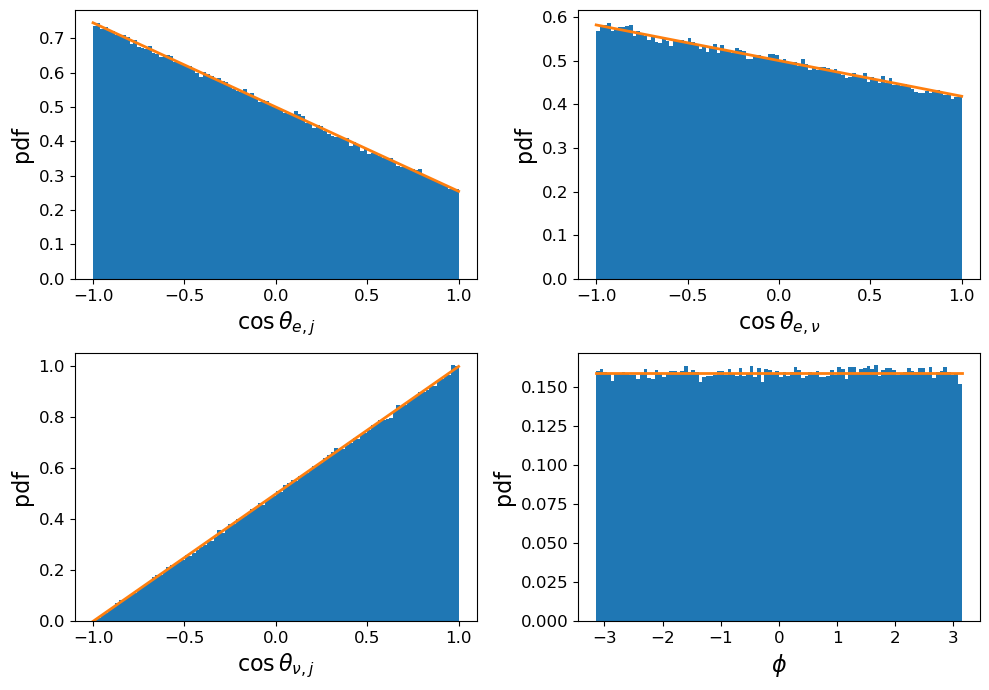

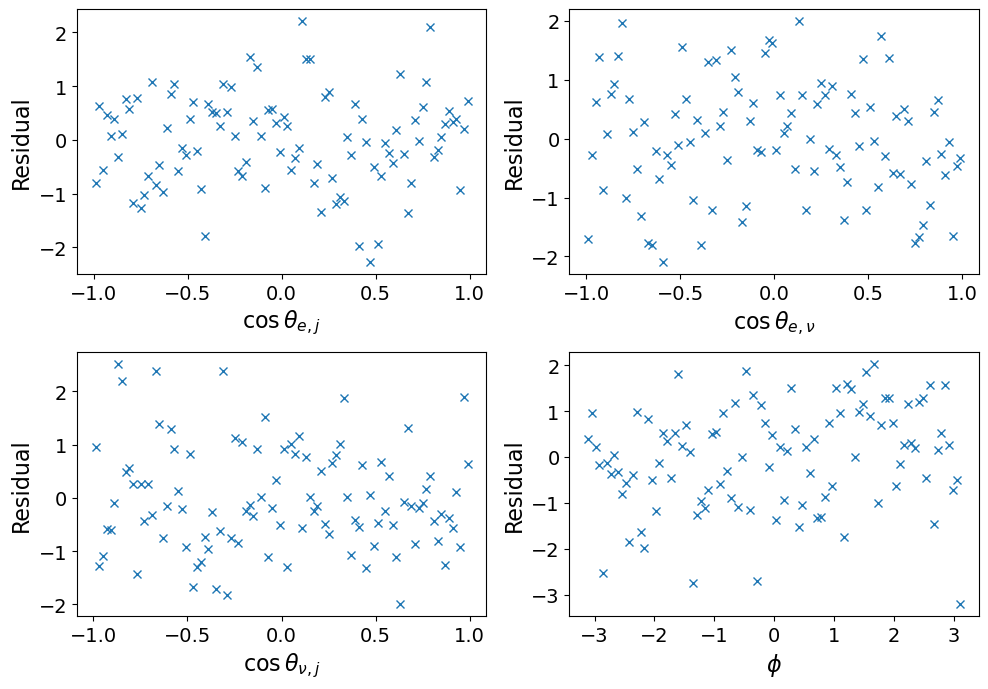

In [19]:
class Co60_data_analysis(data_analysis):
    def __init__(self, fileName):
        super().__init__(fileName, 1)
    def event_mask(self):
        part_events = np.bincount(self.events)
        events_mask = np.arange(part_events.size)[part_events == 5] #60Ni + e- + enu + 2 gamma
        self.data = self.data[np.isin(self.events, events_mask),:]
        self.names = self.names[np.isin(self.events, events_mask)]
    
#Standard Model Gamov-Teller

def SM_coeffs(E):
    return (-1/3, 0, 1, -1, 1, 0)
   
SM_60Co_polZpos = Co60_data_analysis("build/60Co_polZpos.txt")
SM_60Co_polZpos.event_mask()
SM_60Co_polZpos.kinematical_data()
SM_60Co_polZpos.kinematical_data_ref()
SM_60Co_polZpos.theoretical_dist(SM_coeffs,numComp=True)
SM_60Co_polZpos.plot_distribution_histograms(showTheory=True,bins=100,fileName="60Co_SM_hists")
SM_60Co_polZpos.plot_residuals(fileName="60Co_SM_res")

1.0566790861432394 1.0308183858719813 0.9716176296732024 1.1032135124999085


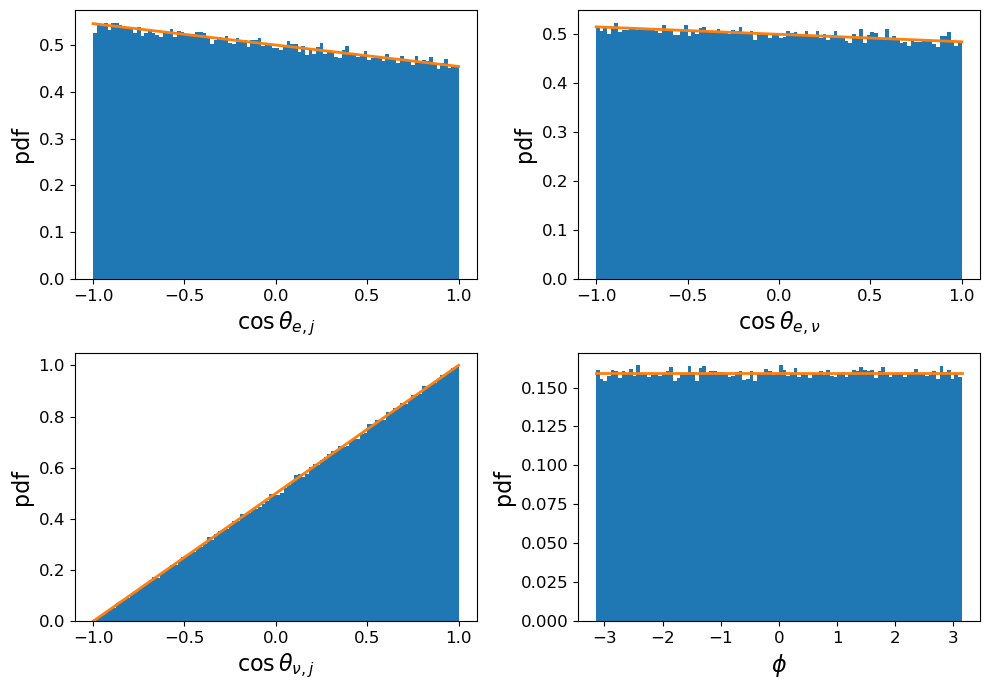

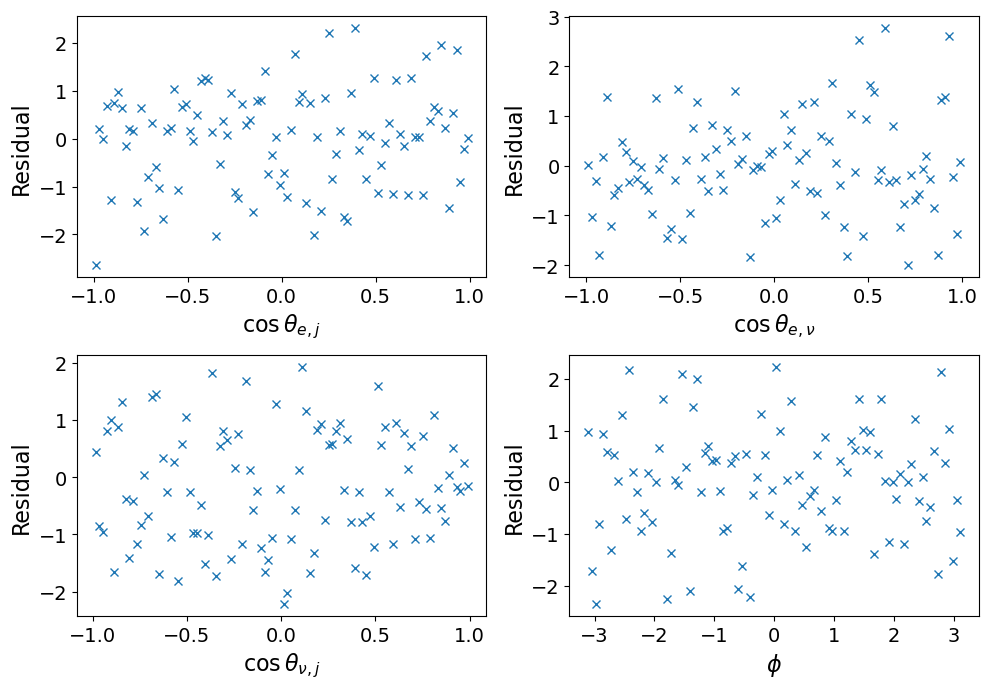

0.4874070552978415 0.8523184927235825 0.1741964802646738


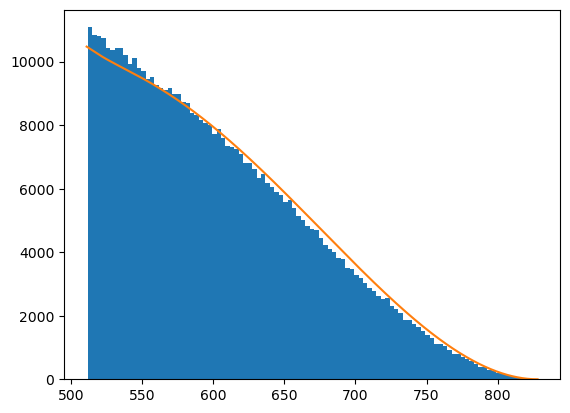

In [82]:
#Gamov-Teller with C_T = C_T' = 1/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 28 #need Z of daughter nuclei, 60Ni
gamma = np.sqrt(1-Z**2*alpha**2)

def CTposRe_coeffs(E):
    a = -1/3*(1/3)
    c = 1/3
    A = -1/3
    b = 2/3*gamma*np.sqrt(2)
    B = 2/3*(1.5+gamma*mass_e/E*np.sqrt(2))
    return (a, b, c, A, B, 0)
   
CTposre_60Co_polZpos = Co60_data_analysis("build/60Co_polZpos_ctposRe.txt")
CTposre_60Co_polZpos.event_mask()
CTposre_60Co_polZpos.kinematical_data()
CTposre_60Co_polZpos.kinematical_data_ref()
CTposre_60Co_polZpos.theoretical_dist(CTposRe_coeffs,numComp=True)
CTposre_60Co_polZpos.plot_distribution_histograms(showTheory=True,bins=100,fileName="60Co_CTposRe_hists")
CTposre_60Co_polZpos.plot_residuals("60Co_CTposRe_res")

CTposIm_E_dist = getattr(CTposre_60Co_polZpos,"data_E_el")
CTposIm_ze_dist = getattr(CTposre_60Co_polZpos,"cos_el")
CTposIm_zelenu_dist = getattr(CTposre_60Co_polZpos,"data_angle_elenu")

plt.hist(CTposIm_E_dist,bins=100)
W_0 = 317.06/mass_e + 1
E_range = np.linspace(mass_e+0.1,317.06+mass_e,6000)
dist_E = []
av_beta = 0
av_inversegamma = 0
for E in E_range:
    W = E/mass_e
    dist = phase_space(W,W_0)*fermi_function(W,28,60)
    dist_E.append(dist)
    av_beta += dist*np.sqrt(1-1/W**2)
    av_inversegamma += dist/W

dist_E = np.array(dist_E)
av_beta /= dist_E.sum()
av_inversegamma /= dist_E.sum()
print(av_beta,av_inversegamma,av_inversegamma*28/137)

dist_E = dist_E/dist_E.sum()*CTposIm_E_dist.size*60
plt.plot(E_range,dist_E)
plt.show()


1.1801335327216593 0.950560487616393 1.0268339690578376 0.8706717117121647


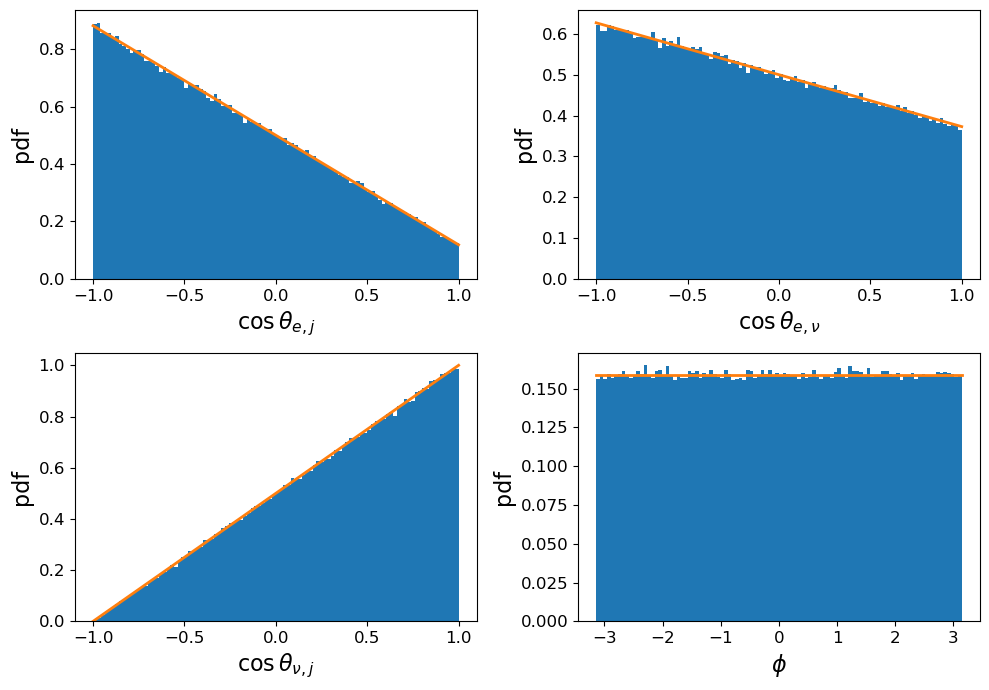

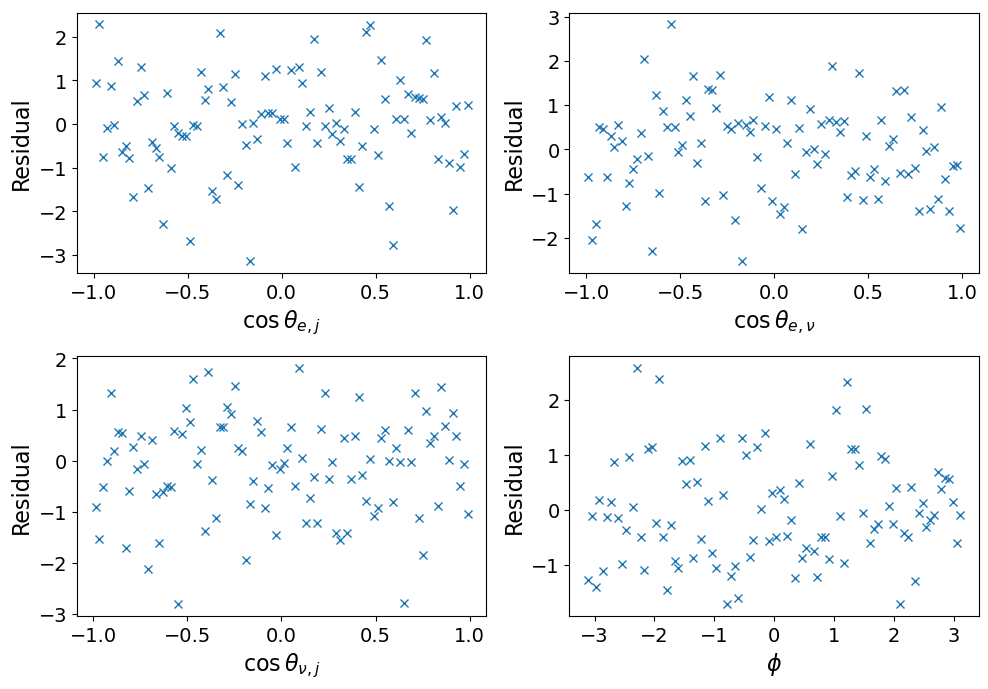

In [21]:
#Gamov-Teller with C_T = C_T' = -1/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 28 #need Z of daughter nuclei, 60Ni
gamma = np.sqrt(1-Z**2*alpha**2)

def CTnegRe_coeffs(E):
    a = -1/3*(1/3)
    c = 1/3
    A = -1/3
    b = -2/3*gamma*np.sqrt(2)
    B = 2/3*(1.5-gamma*mass_e/E*np.sqrt(2))
    return (a, b, c, A, B, 0)
   
CTnegRe_60Co_polZpos = Co60_data_analysis("build/60Co_polZpos_ctnegRe.txt")
CTnegRe_60Co_polZpos.event_mask()
CTnegRe_60Co_polZpos.kinematical_data()
CTnegRe_60Co_polZpos.kinematical_data_ref()
CTnegRe_60Co_polZpos.theoretical_dist(CTnegRe_coeffs,numComp=True)
CTnegRe_60Co_polZpos.plot_distribution_histograms(showTheory=True,bins=100,fileName="60Co_CTnegRe_hists")
CTnegRe_60Co_polZpos.plot_residuals("60Co_CTnegRe_res")

0.765381930344391 1.1859851583352778 0.958848239464108 0.8856645951797827


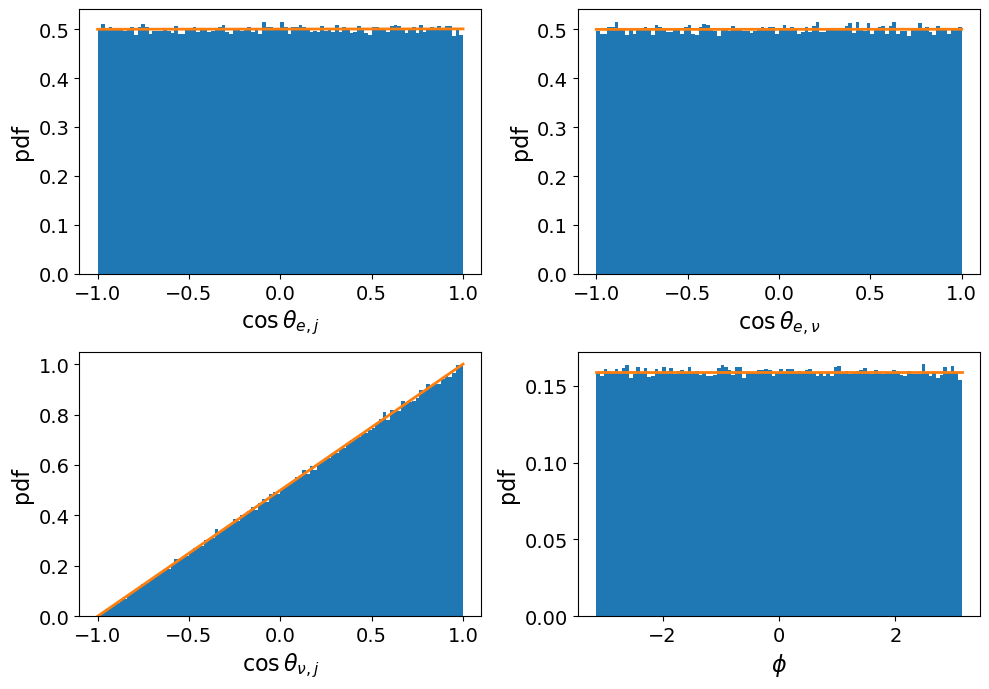

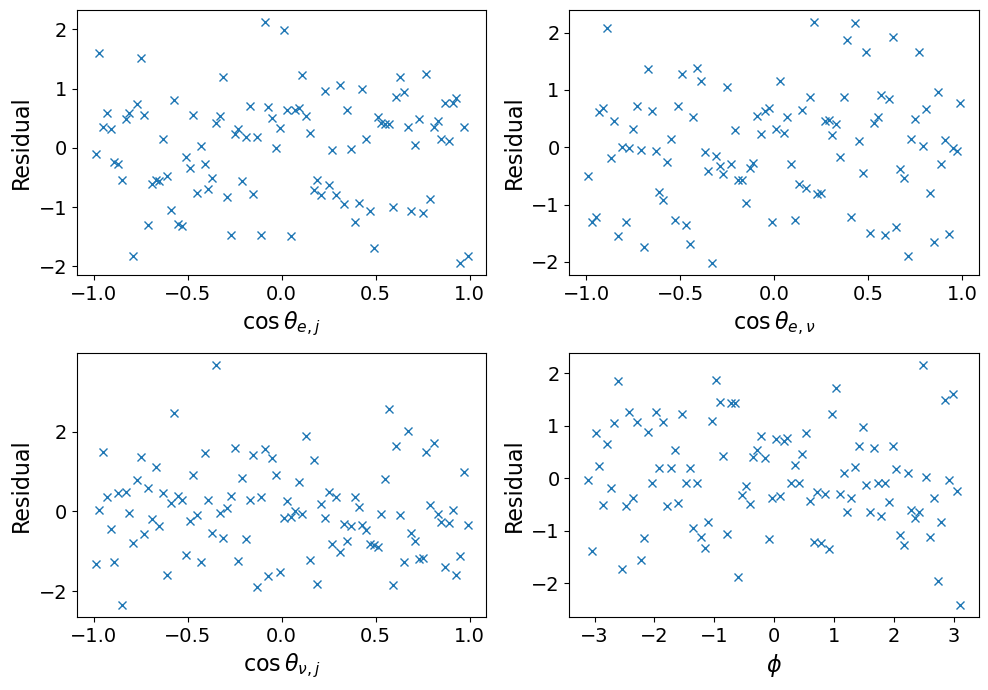

In [8]:
#Gamov-Teller with C_T = C_T' = i/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 28 #need Z of daughter nuclei, 60Ni
gamma = np.sqrt(1-Z**2*alpha**2)

def CTposIm_coeffs(E):
    coulombCorr = alpha*Z/np.sqrt(E**2/mass_e**2-1)
    a = 1/3*(1/3)*(-1+2*coulombCorr*np.sqrt(2))
    c = -1/3*(-1+2*coulombCorr*np.sqrt(2))
    A = 1/3*(-1+2*coulombCorr*np.sqrt(2))
    b = 0
    B = 1
    return (a, b, c, A, B, 0)
   
CTposIm_60Co_polZpos = Co60_data_analysis("build/60Co_polZpos_ctposIm.txt")
CTposIm_60Co_polZpos.event_mask()
CTposIm_60Co_polZpos.kinematical_data()
CTposIm_60Co_polZpos.kinematical_data_ref()
CTposIm_60Co_polZpos.theoretical_dist(CTposIm_coeffs,numComp=True)
CTposIm_60Co_polZpos.plot_distribution_histograms(showTheory=True,bins=100,fileName="60Co_CTposIm_hists")
CTposIm_60Co_polZpos.plot_residuals("60Co_CTposIm_res")

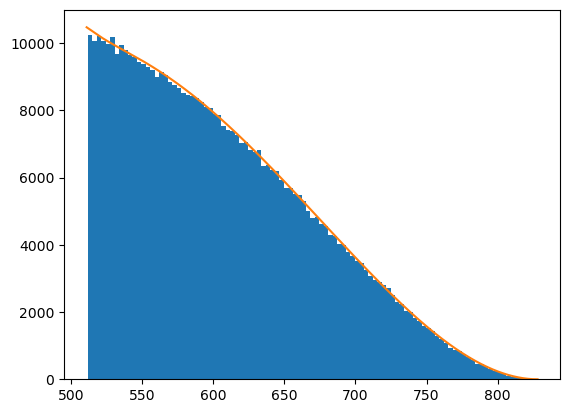

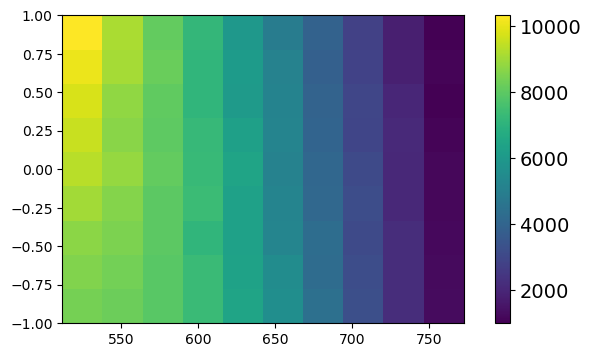

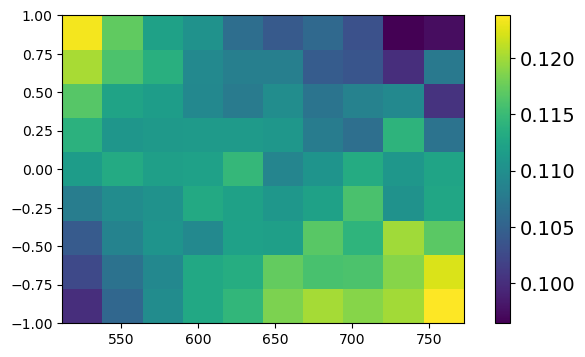

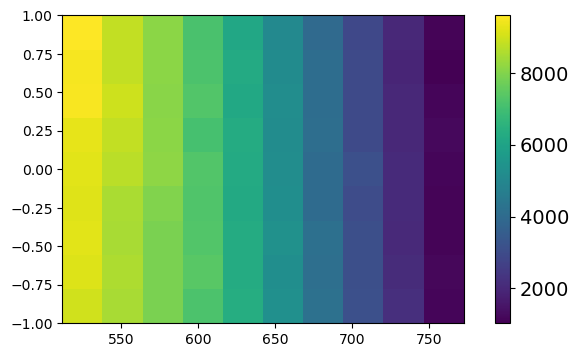

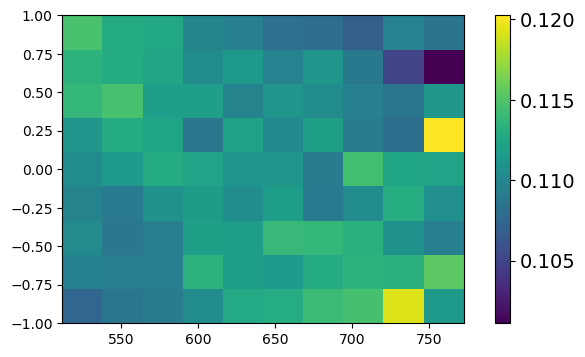

In [79]:
CTposIm_E_dist = getattr(CTposIm_60Co_polZpos,"data_E_el")
CTposIm_ze_dist = getattr(CTposIm_60Co_polZpos,"cos_el")
CTposIm_zelenu_dist = getattr(CTposIm_60Co_polZpos,"data_angle_elenu")

plt.hist(CTposIm_E_dist,bins=100)
W_0 = 317.06/mass_e + 1
E_range = np.linspace(mass_e+0.1,317.06+mass_e,6000)
dist_E = []
av_beta = 0
av_inversegamma = 0
for E in E_range:
    W = E/mass_e
    dist = phase_space(W,W_0)*fermi_function(W,28,60)
    dist_E.append(dist)
    av_beta += dist*np.sqrt(1-1/W**2)
    av_inversegamma += dist/W
dist_E = np.array(dist_E)
dist_E = dist_E/dist_E.sum()*CTposIm_E_dist.size*60
plt.plot(E_range,dist_E)
plt.show()

hist2d, x_bin, y_bin = np.histogram2d(CTposIm_E_dist,CTposIm_ze_dist,[12,9])
hist2d = hist2d[np.sum(hist2d,axis=1)>10000,:]
x_bin = x_bin[:hist2d.shape[0]+1]
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, aspect=100)
im = ax.pcolormesh(x_bin[:hist2d.shape[0]+1], y_bin, hist2d.T)
ax.set_ylim(-1,1)
ax.set_xlim(512,x_bin.max())
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=14)
plt.show()
hist2d = hist2d/np.sum(hist2d,axis=1)[:,np.newaxis]
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, aspect=100)
im = ax.pcolormesh(x_bin[:hist2d.shape[0]+1], y_bin, hist2d.T)
ax.set_ylim(-1,1)
ax.set_xlim(512,x_bin.max())
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=14)
plt.show()

hist2d, x_bin, y_bin = np.histogram2d(CTposIm_E_dist,CTposIm_zelenu_dist,[12,9])
hist2d = hist2d[np.sum(hist2d,axis=1)>10000,:]
x_bin = x_bin[:hist2d.shape[0]+1]
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, aspect=100)
im = ax.pcolormesh(x_bin[:hist2d.shape[0]+1], y_bin, hist2d.T)
ax.set_ylim(-1,1)
ax.set_xlim(512,x_bin.max())
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=14)
plt.show()
hist2d = hist2d/np.sum(hist2d,axis=1)[:,np.newaxis]
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, aspect=100)
im = ax.pcolormesh(x_bin[:hist2d.shape[0]+1], y_bin, hist2d.T)
ax.set_ylim(-1,1)
ax.set_xlim(512,x_bin.max())
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=14)
plt.show()

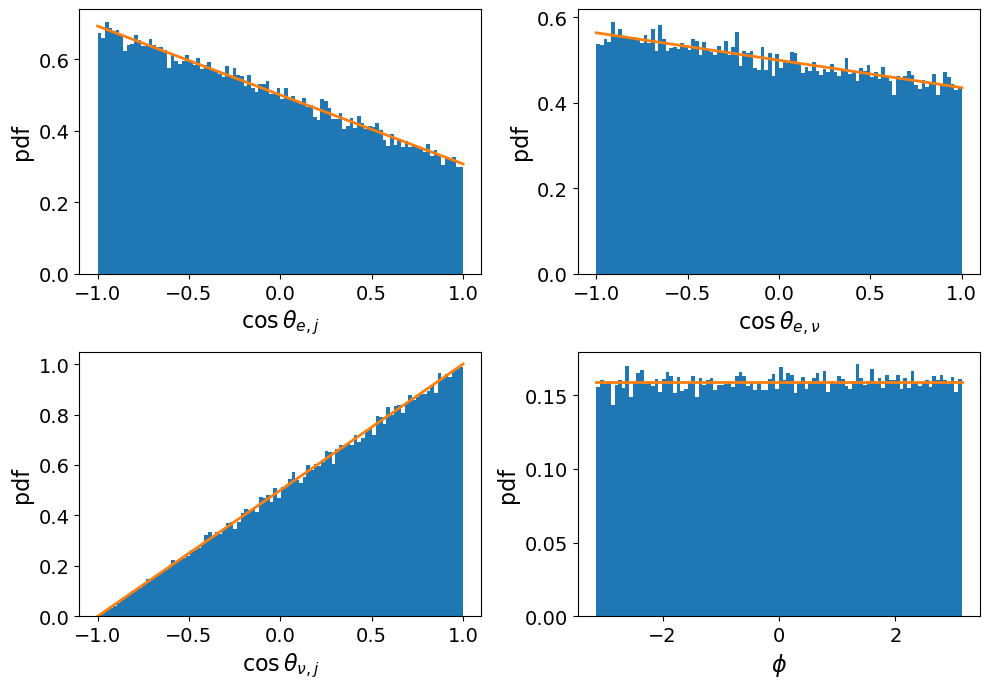

In [9]:
#Gamov-Teller with C_T = C_T' = 0.2i, C_A = C_A' = 1
#xi = 2.08

alpha = 0.0072973525664
Z = 28 #need Z of daughter nuclei, 60Ni
gamma = np.sqrt(1-Z**2*alpha**2)

def CTposImS_coeffs(E):
    coulombCorr = alpha*Z/np.sqrt(E**2/mass_e**2-1)
    a = 1/2.08*(1/3)*(-1.92+2*coulombCorr*0.4)
    c = -1/2.08*(-1.92+2*coulombCorr*0.4)
    A = 1/2.08*(-1.92+2*coulombCorr*0.4)
    b = 0
    B = 1
    return (a, b, c, A, B, 0)
   
CTposImS_60Co_polZpos = Co60_data_analysis("build/60Co_polZpos_ctposImS.txt")
CTposImS_60Co_polZpos.event_mask()
CTposImS_60Co_polZpos.kinematical_data()
CTposImS_60Co_polZpos.kinematical_data_ref()
CTposImS_60Co_polZpos.theoretical_dist(CTposImS_coeffs)
CTposImS_60Co_polZpos.plot_distribution_histograms(showTheory=True,bins=100)

1.2917659855441663 0.9787553071116758 1.1105624307354536 1.1953348828947805


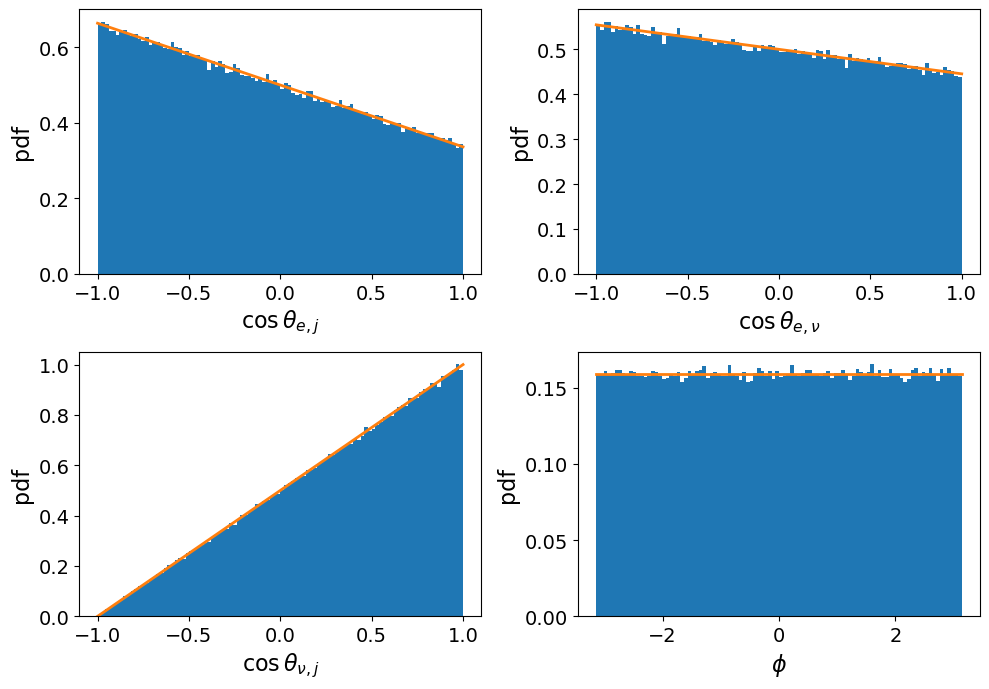

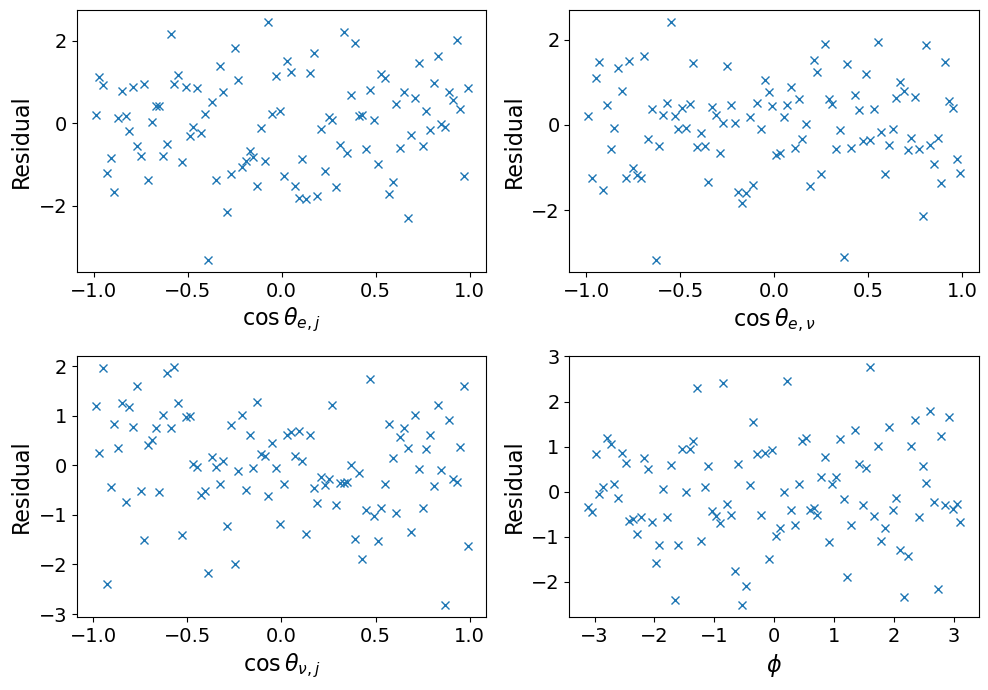

In [10]:
#Gamov-Teller with C_T = C_T' = -i/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 28 #need Z of daughter nuclei, 60Ni
gamma = np.sqrt(1-Z**2*alpha**2)

def CTnegIm_coeffs(E):
    coulombCorr = alpha*Z/np.sqrt(E**2/mass_e**2-1)
    a = 1/3*(1/3)*(-1-2*coulombCorr*np.sqrt(2))
    c = -1/3*(-1-2*coulombCorr*np.sqrt(2))
    A = 1/3*(-1-2*coulombCorr*np.sqrt(2))
    b = 0
    B = 1
    return (a, b, c, A, B, 0)
   
CTnegIm_60Co_polZpos = Co60_data_analysis("build/60Co_polZpos_ctnegIm.txt")
CTnegIm_60Co_polZpos.event_mask()
CTnegIm_60Co_polZpos.kinematical_data()
CTnegIm_60Co_polZpos.kinematical_data_ref()
CTnegIm_60Co_polZpos.theoretical_dist(CTnegIm_coeffs,numComp=True)
CTnegIm_60Co_polZpos.plot_distribution_histograms(showTheory=True,bins=100,fileName="60Co_CTnegIm_hists")
CTnegIm_60Co_polZpos.plot_residuals("60Co_CTnegIm_res")

0.976324532846288 1.0693476519554215 1.0478432012028431 1.0109699439573125


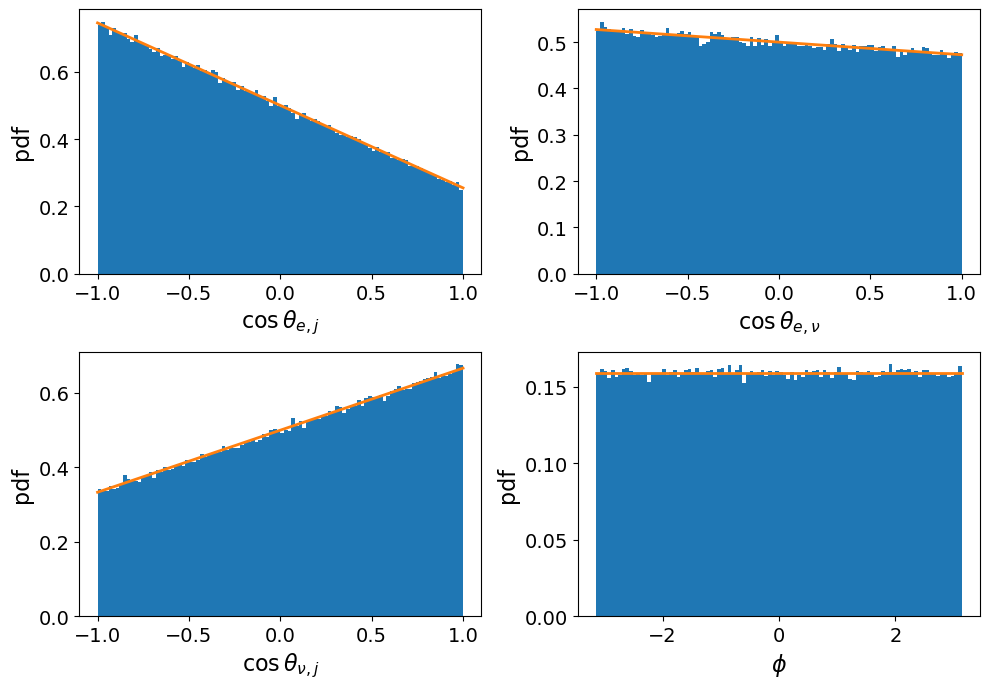

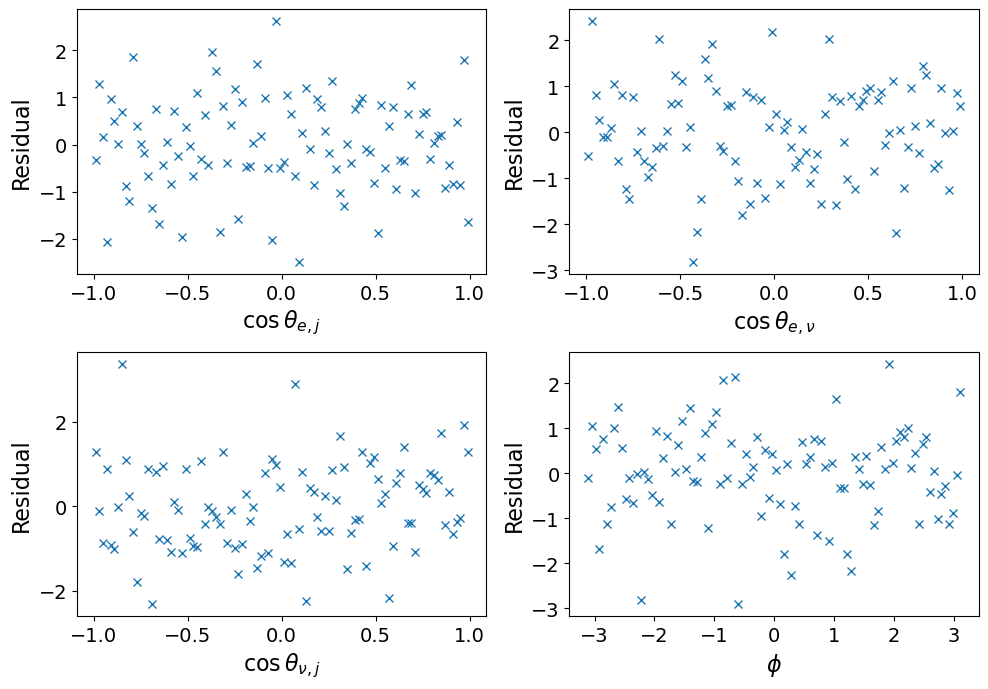

In [11]:
#Gamov-Teller with C_T = 1/np.sqrt(2), C_T = -1/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 28 #need Z of daughter nuclei, 60Ni
gamma = np.sqrt(1-Z**2*alpha**2)

def CTmixRe_coeffs(E):
    coulombCorr = alpha*Z/np.sqrt(E**2/mass_e**2-1)
    a = 1/3*(1/3)*(-1)
    c = -1/3*(-1)
    A = 1/3*(-3)
    b = 0
    B = 1/3
    return (a, b, c, A, B, 0)
   
CTmixRe_60Co_polZpos = Co60_data_analysis("build/60Co_polZpos_ctoppRe.txt")
CTmixRe_60Co_polZpos.event_mask()
CTmixRe_60Co_polZpos.kinematical_data()
CTmixRe_60Co_polZpos.kinematical_data_ref()
CTmixRe_60Co_polZpos.theoretical_dist(CTmixRe_coeffs,numComp=True)
CTmixRe_60Co_polZpos.plot_distribution_histograms(showTheory=True,bins=100,fileName="60Co_CTmixRe_hists")
CTmixRe_60Co_polZpos.plot_residuals(fileName="60Co_CTmixRe_res")

/tmp/ipykernel_3816245/1654033880.py:36: RuntimeWarning: divide by zero encountered in divide
  data_cosphi = (self.data_angle_elenu-self.cos_el*self.cos_enu)/sin_el/sin_enu
/tmp/ipykernel_3816245/1654033880.py:37: RuntimeWarning: divide by zero encountered in divide
  data_sinphi = z_cross_elenu/sin_el/sin_enu


0.8251706509055334 0.8256753845313929 1.0466295116621638 1.2070125138436476


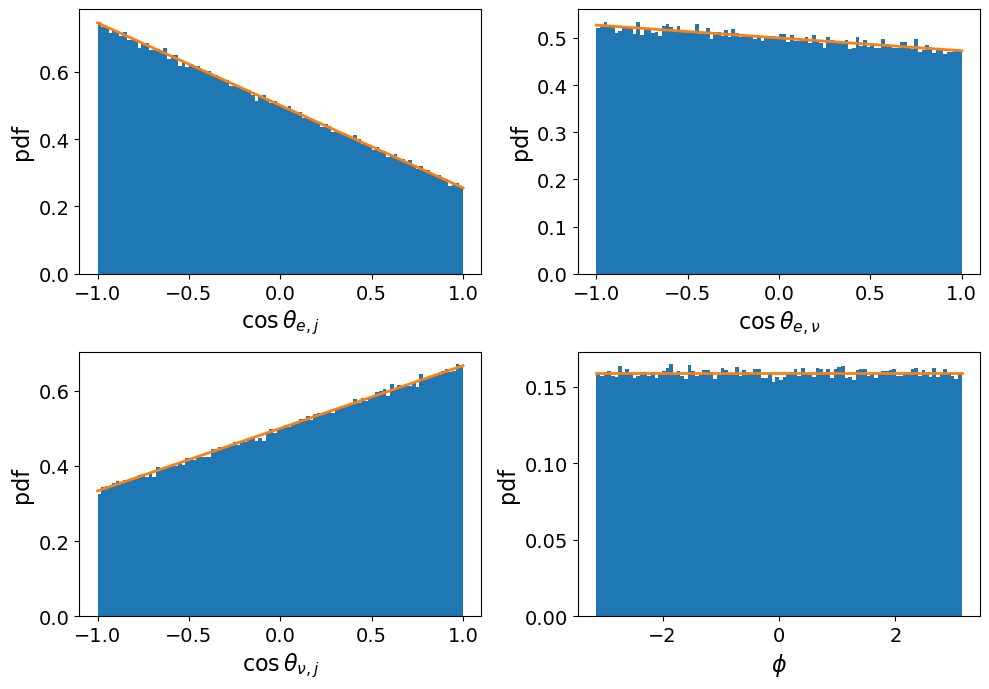

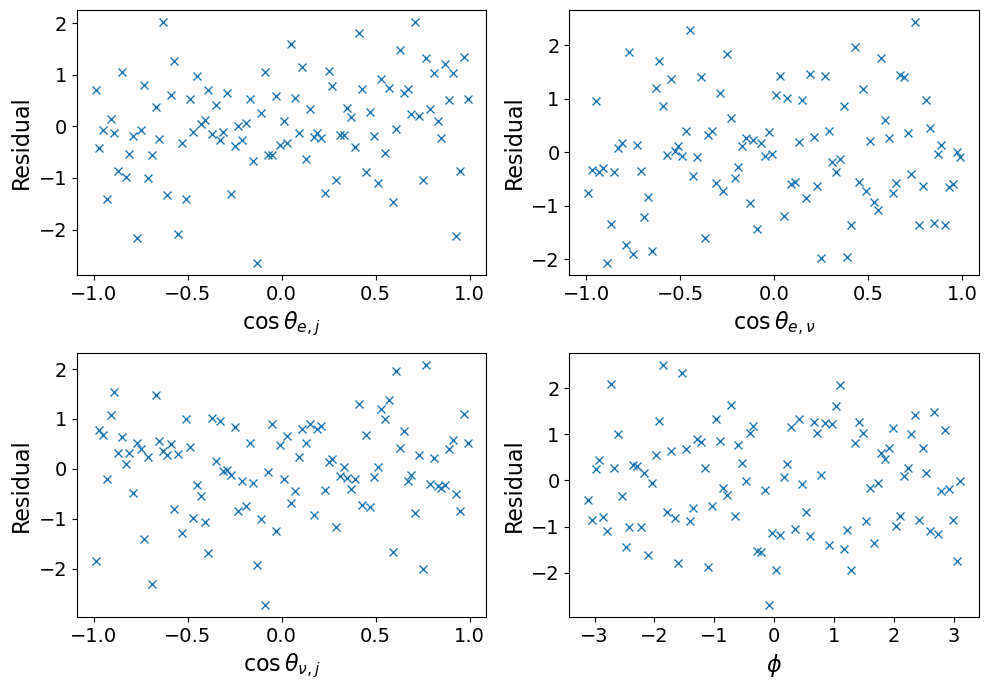

In [12]:
#Gamov-Teller with C_T = i/np.sqrt(2), C_T = -i/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 28 #need Z of daughter nuclei, 60Ni
gamma = np.sqrt(1-Z**2*alpha**2)

def CTmixIm_coeffs(E):
    coulombCorr = alpha*Z/np.sqrt(E**2/mass_e**2-1)
    a = 1/3*(1/3)*(-1)
    c = -1/3*(-1)
    A = 1/3*(-3)
    b = 0
    B = 1/3
    return (a, b, c, A, B, 0)
   
CTmixIm_60Co_polZpos = Co60_data_analysis("build/60Co_polZpos_ctoppIm.txt")
CTmixIm_60Co_polZpos.event_mask()
CTmixIm_60Co_polZpos.kinematical_data()
CTmixIm_60Co_polZpos.kinematical_data_ref()
CTmixIm_60Co_polZpos.theoretical_dist(CTmixIm_coeffs,numComp=True)
CTmixIm_60Co_polZpos.plot_distribution_histograms(showTheory=True,bins=100,fileName="60Co_CToppIm_hists")
CTmixIm_60Co_polZpos.plot_residuals(fileName="60Co_CToppIm_res")

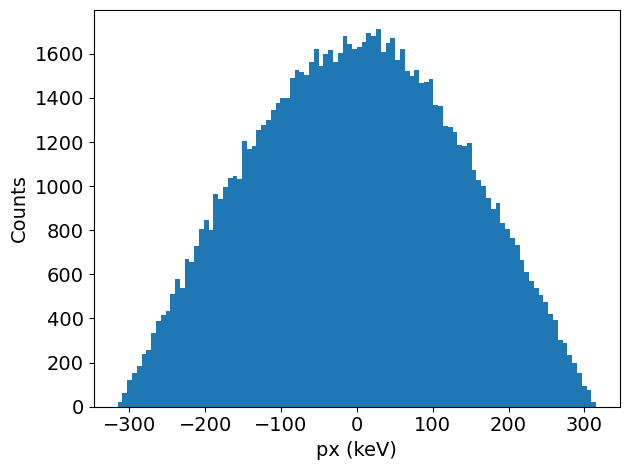

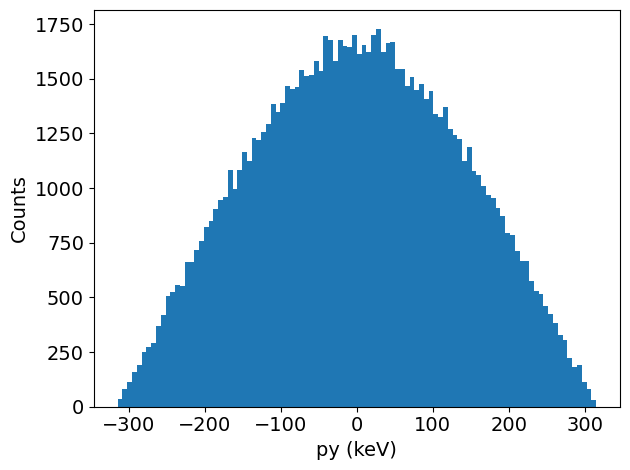

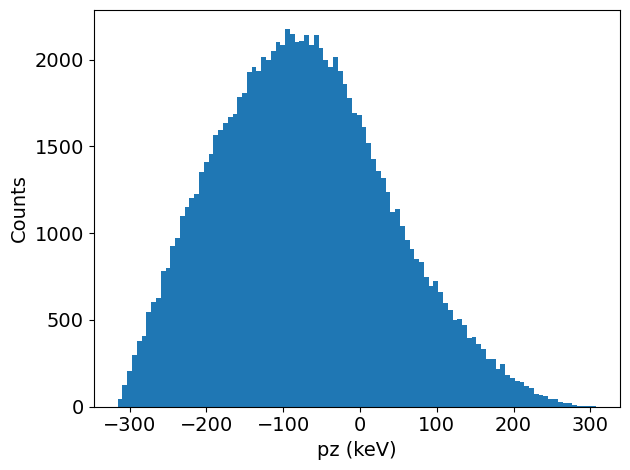

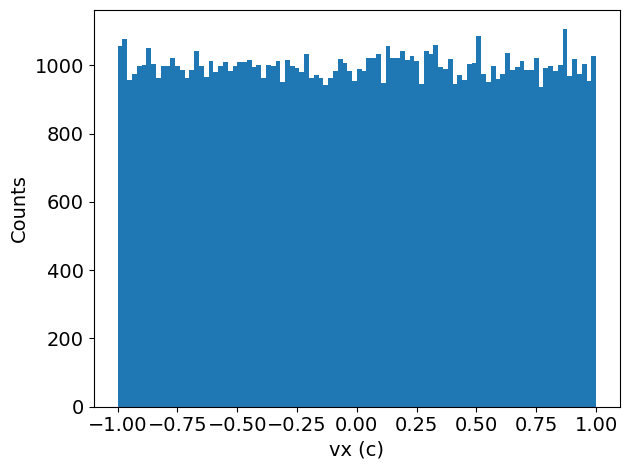

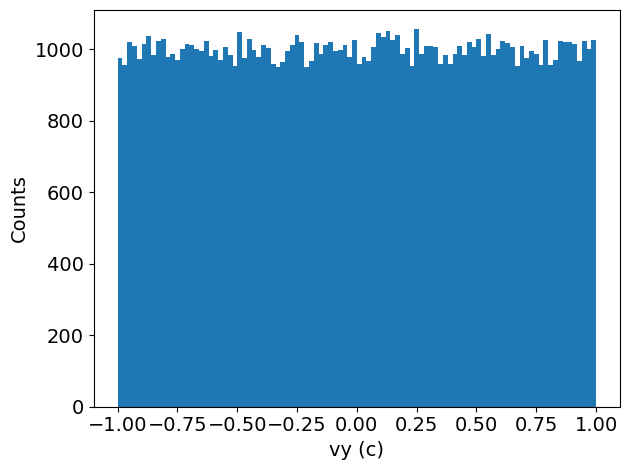

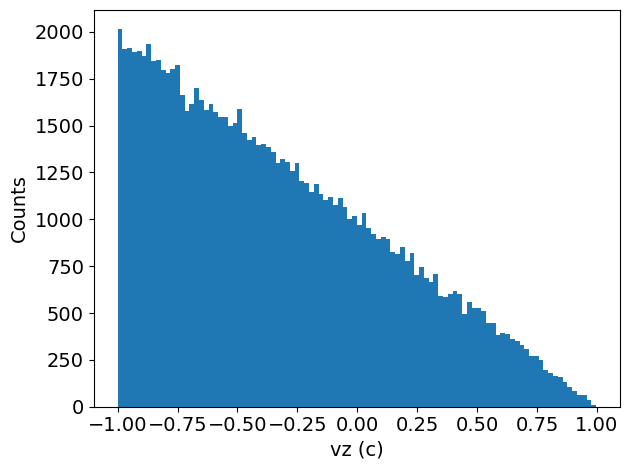

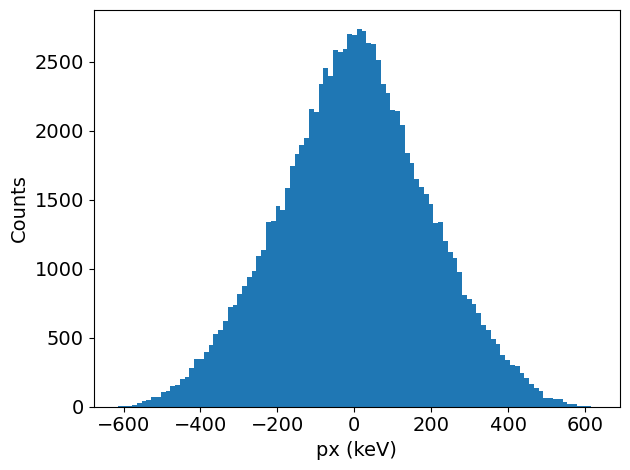

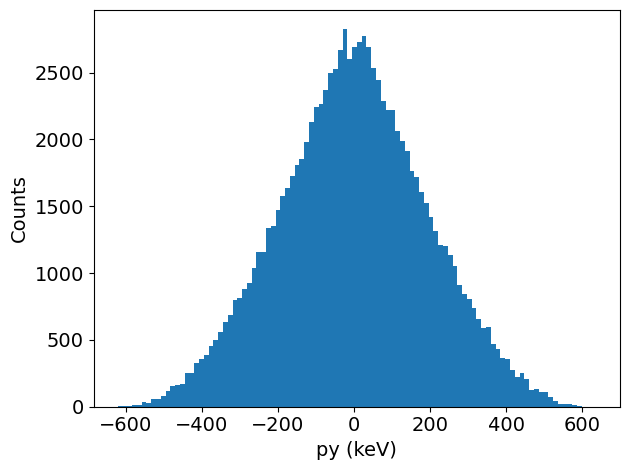

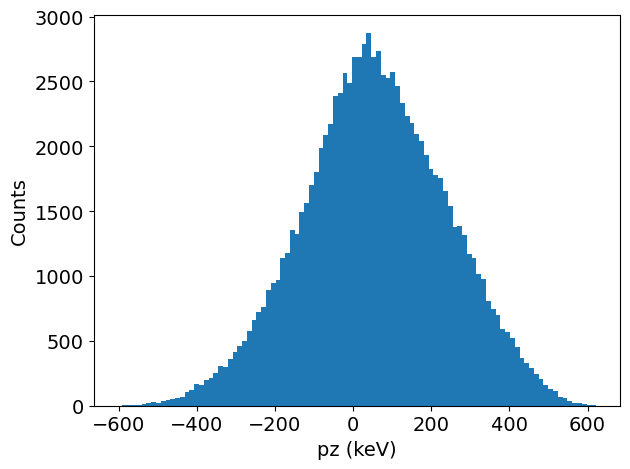

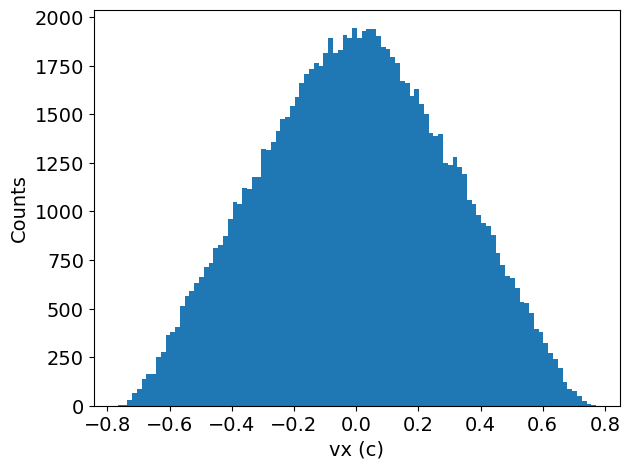

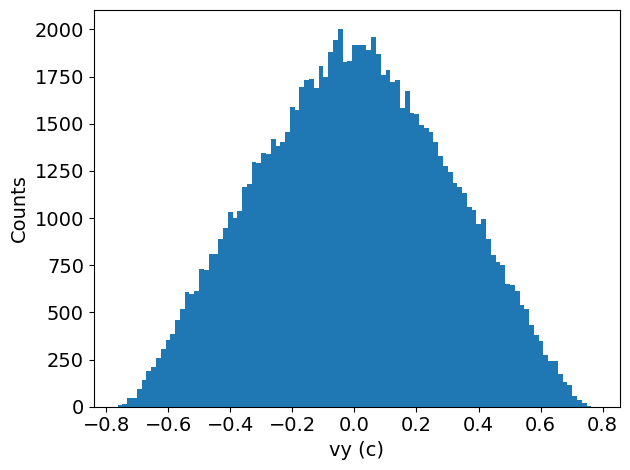

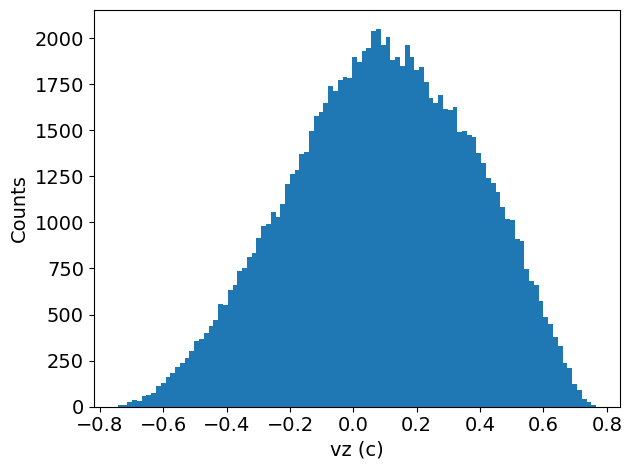

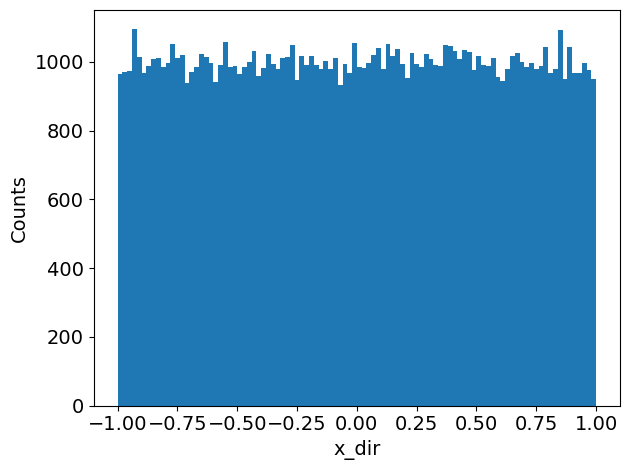

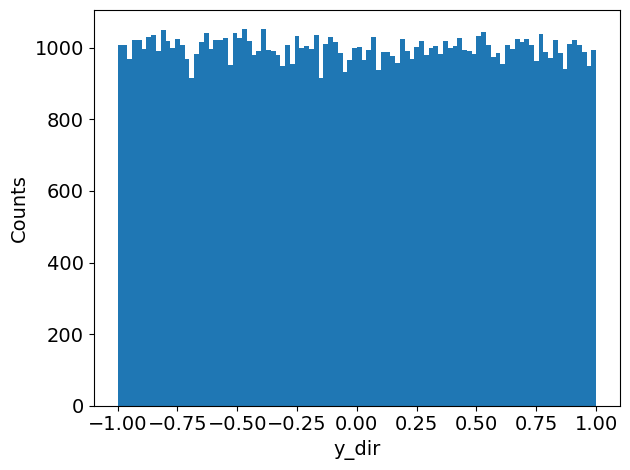

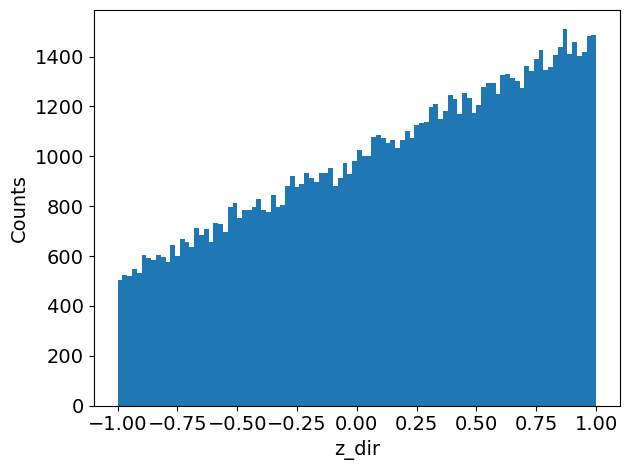

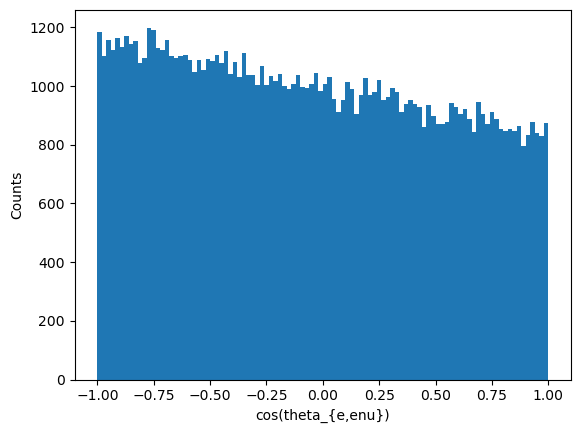

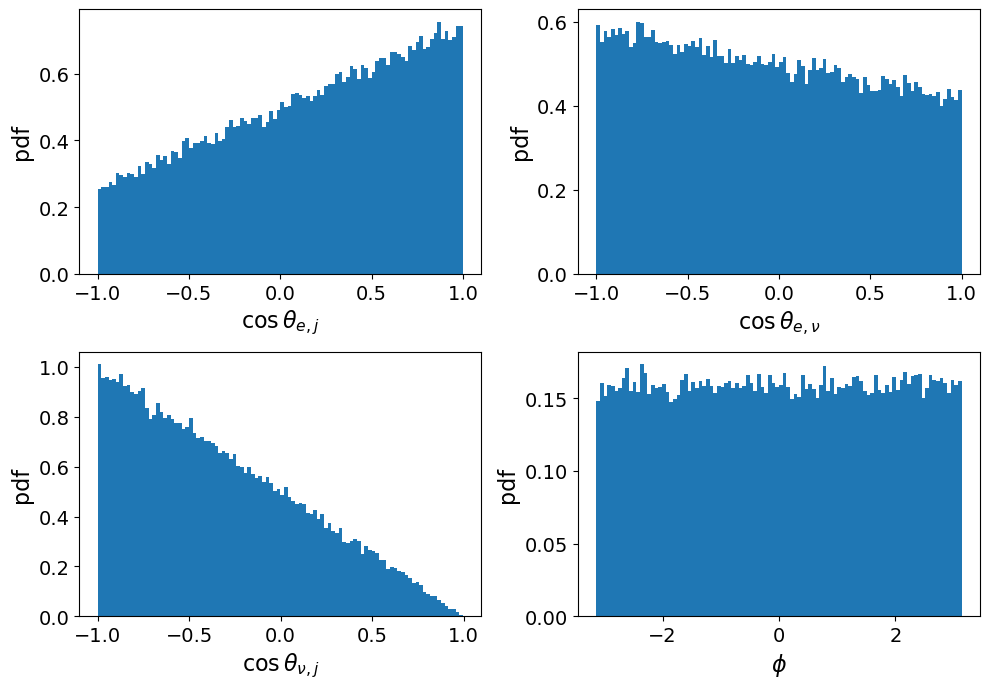

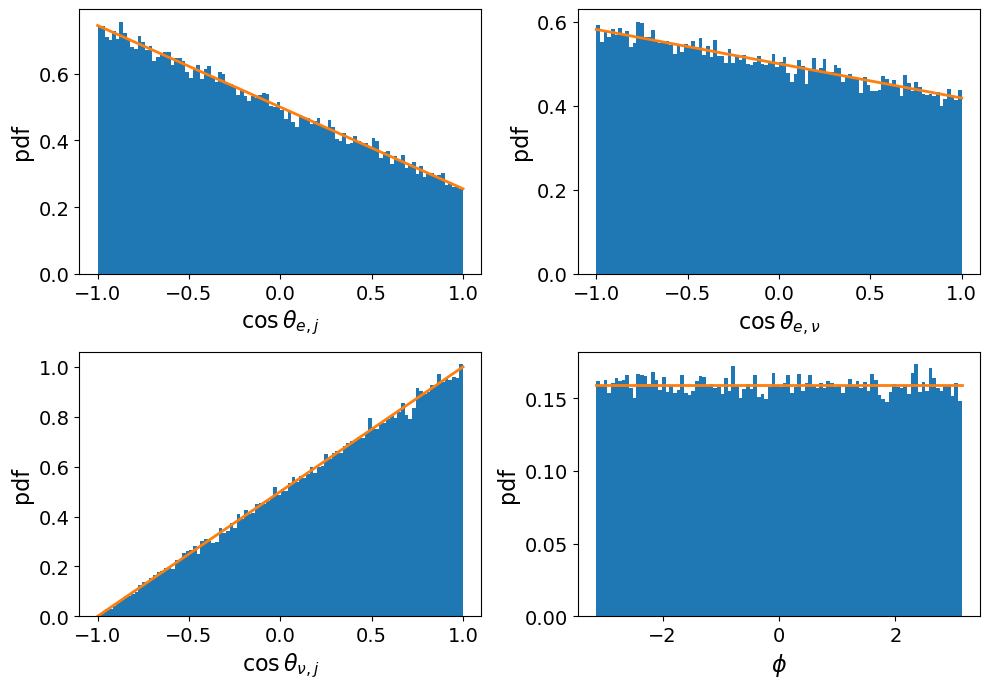

In [5]:
#SM Gamov-Teller but polarised in the -Z direction
#xi = 2

alpha = 0.0072973525664
Z = 28 #need Z of daughter nuclei, 60Ni
gamma = np.sqrt(1-Z**2*alpha**2)

SM_60Co_polZneg = Co60_data_analysis("build/60Co_polZneg.txt")
SM_60Co_polZneg.event_mask()
SM_60Co_polZneg.kinematical_data()
SM_60Co_polZneg.kinematical_data_ref()
SM_60Co_polZneg.plot_kin_histograms(fileName="build/60Co_polZneg.txt")
SM_60Co_polZneg.plot_distribution_histograms(showTheory=False,bins=100)
SM_60Co_polZneg.kinematical_data_ref(polDir=np.array([0,0,-1]))
SM_60Co_polZneg.theoretical_dist(SM_coeffs)
SM_60Co_polZneg.plot_distribution_histograms(showTheory=True,bins=100)

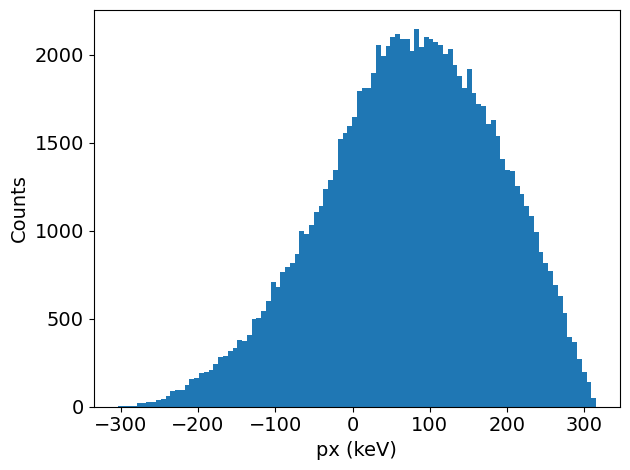

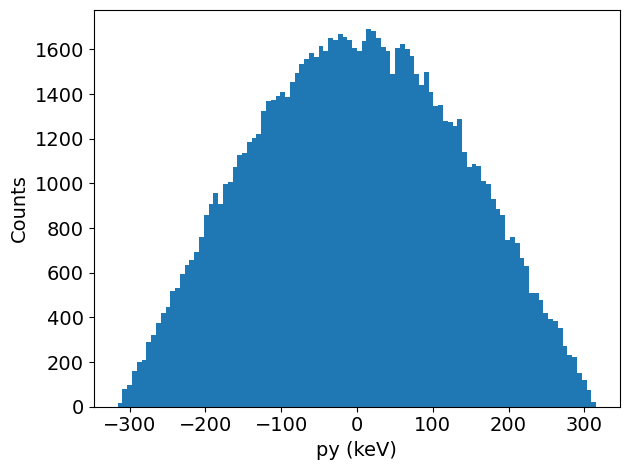

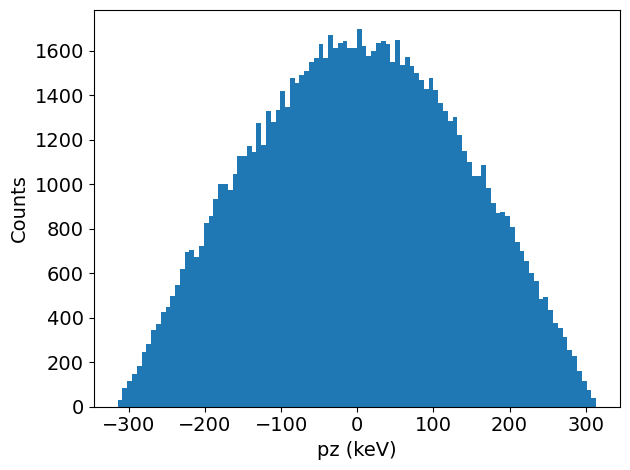

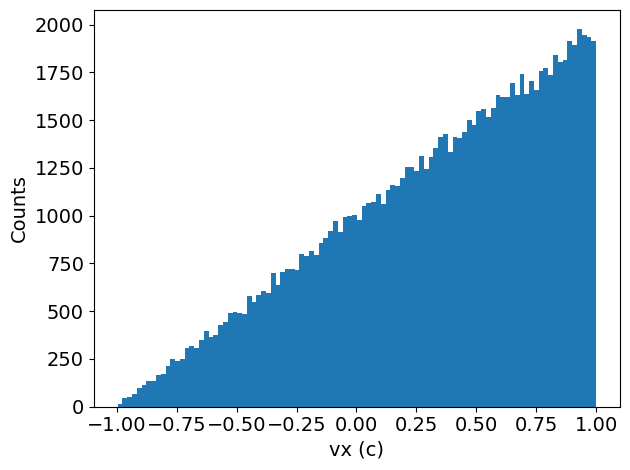

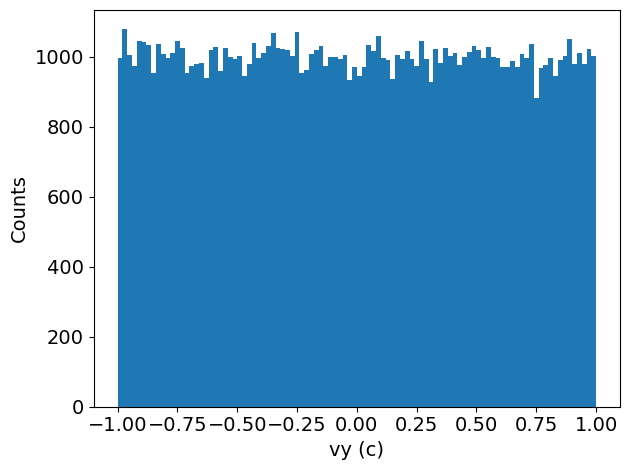

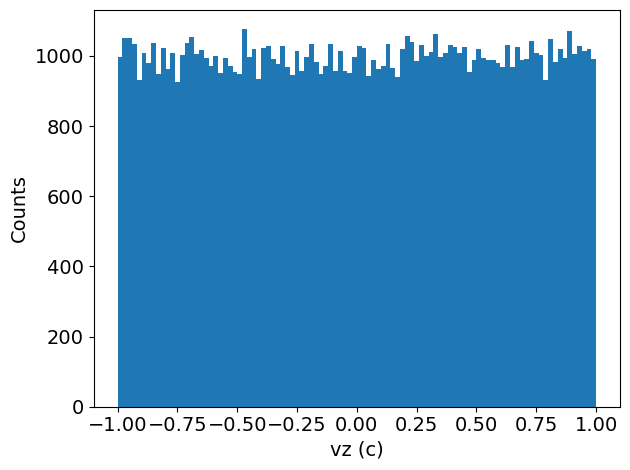

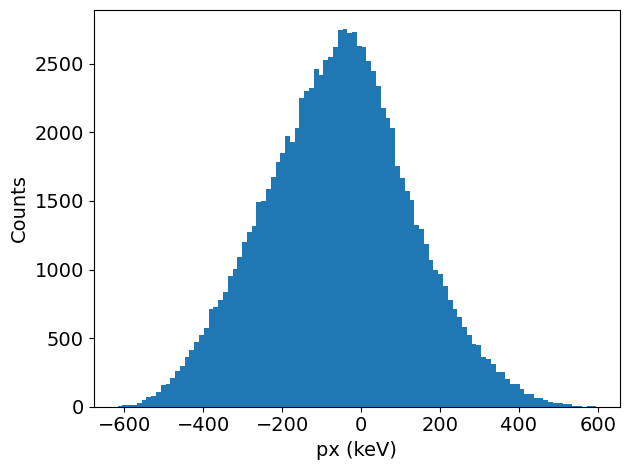

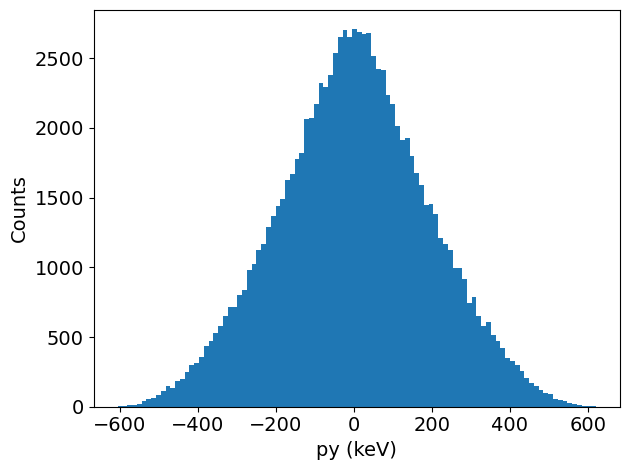

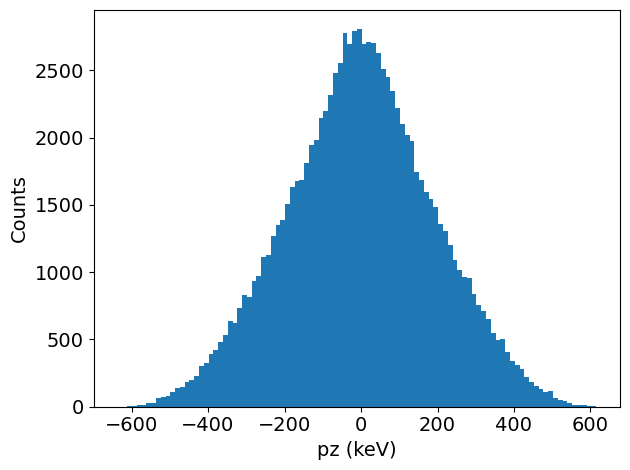

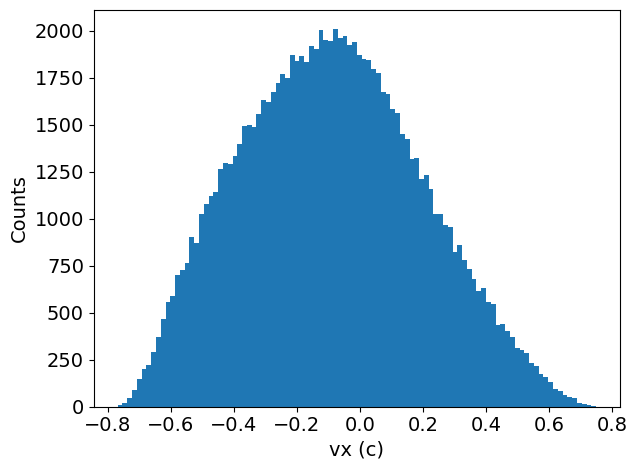

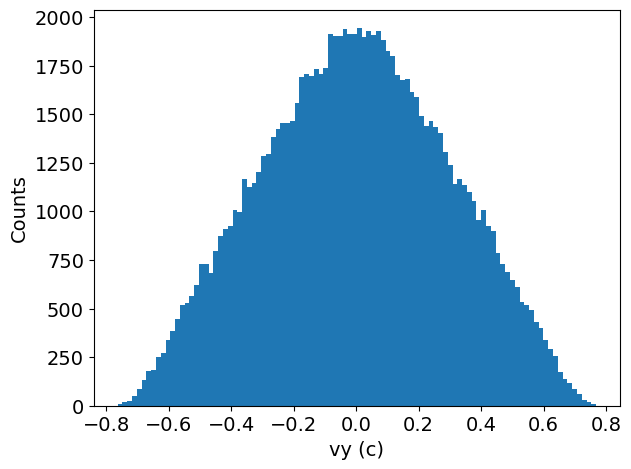

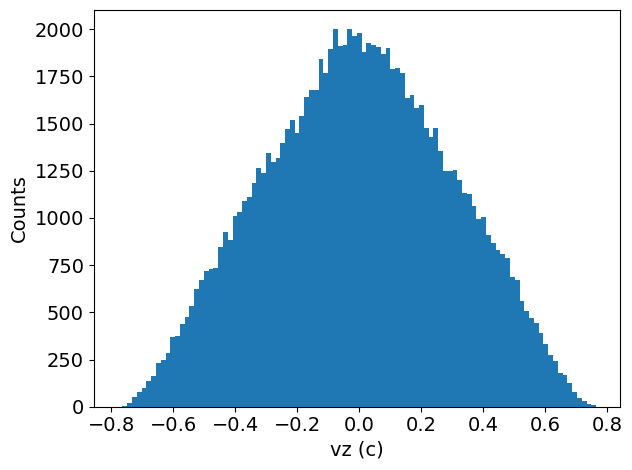

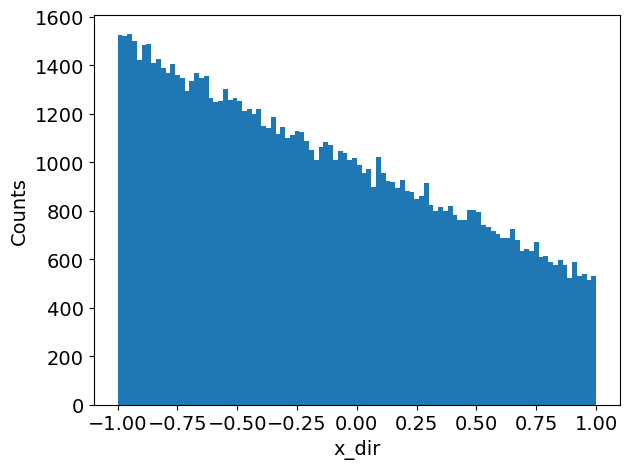

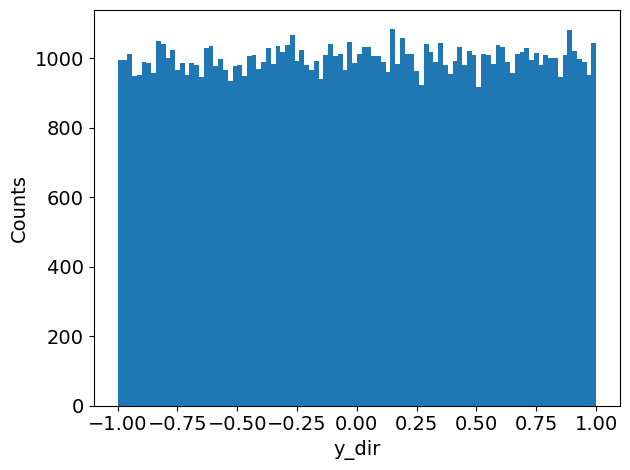

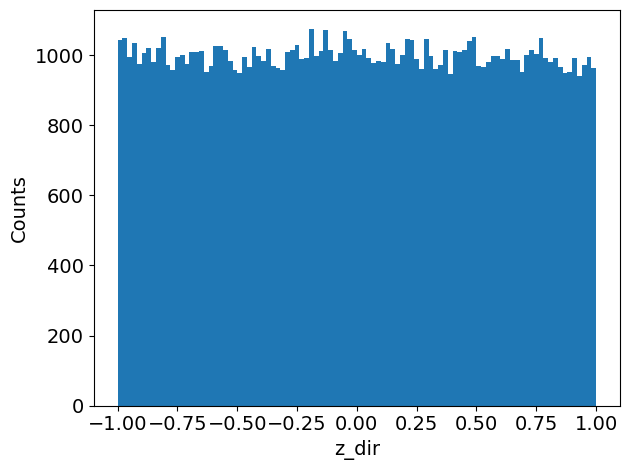

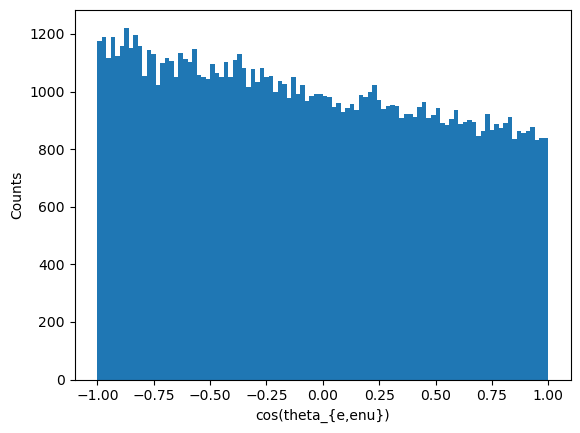

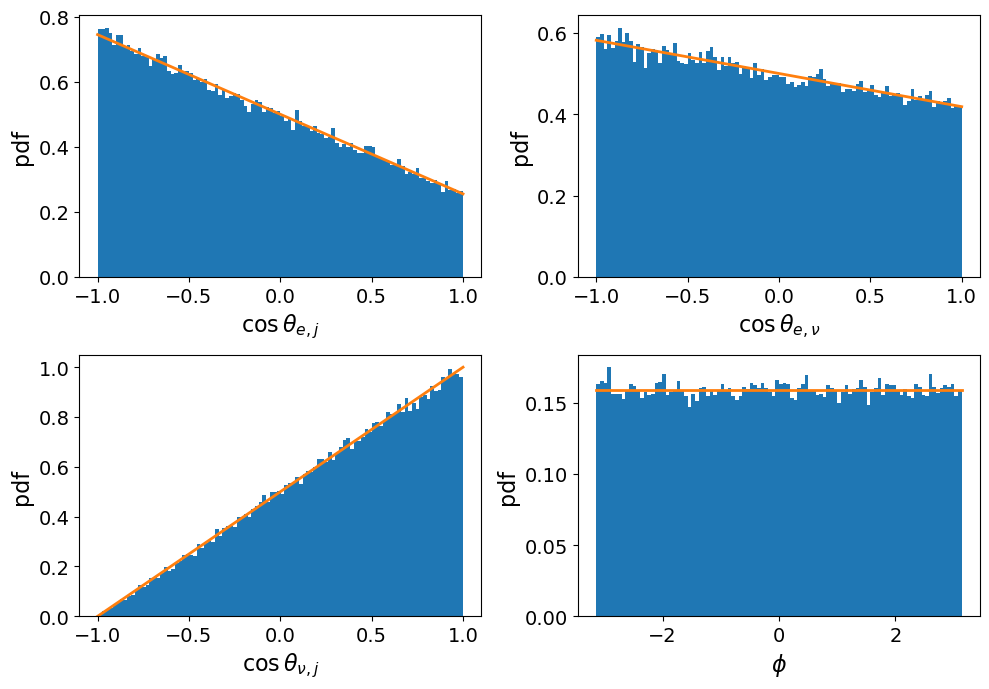

In [6]:
#SM Gamov-Teller but polarised in the X direction
#xi = 2

alpha = 0.0072973525664
Z = 28 #need Z of daughter nuclei, 60Ni
gamma = np.sqrt(1-Z**2*alpha**2)

SM_60Co_polXpos = Co60_data_analysis("build/60Co_polXpos.txt")
SM_60Co_polXpos.event_mask()
SM_60Co_polXpos.kinematical_data()
SM_60Co_polXpos.plot_kin_histograms(fileName="build/60Co_polXpos.txt")
SM_60Co_polXpos.kinematical_data_ref(polDir=np.array([1,0,0]))
SM_60Co_polXpos.theoretical_dist(SM_coeffs)
SM_60Co_polXpos.plot_distribution_histograms(showTheory=True,bins=100)

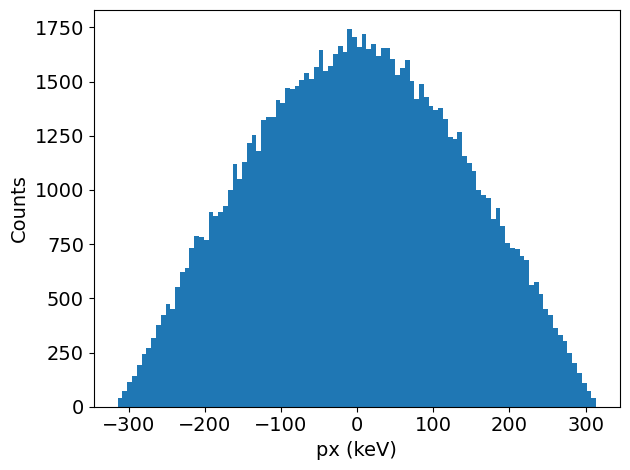

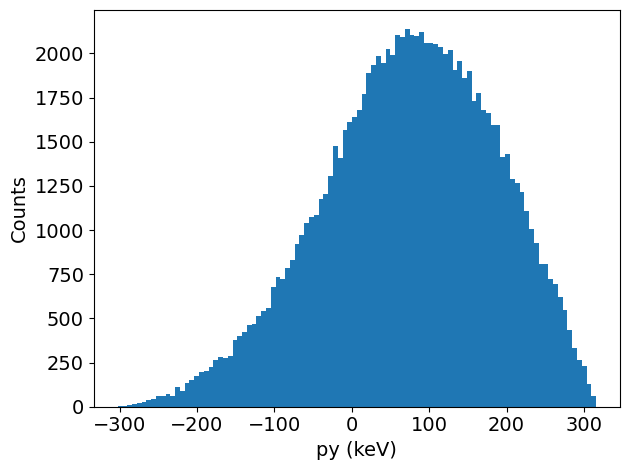

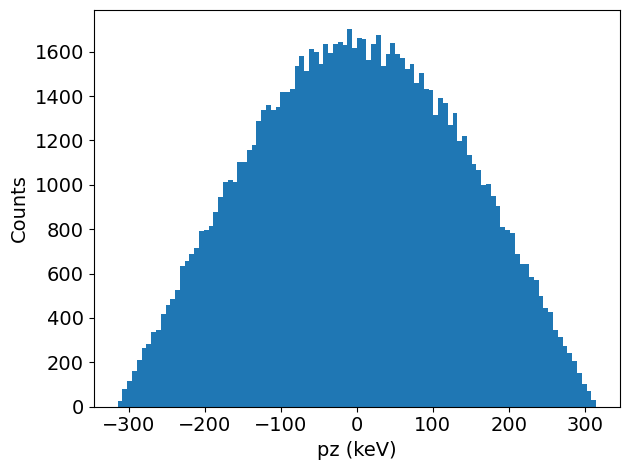

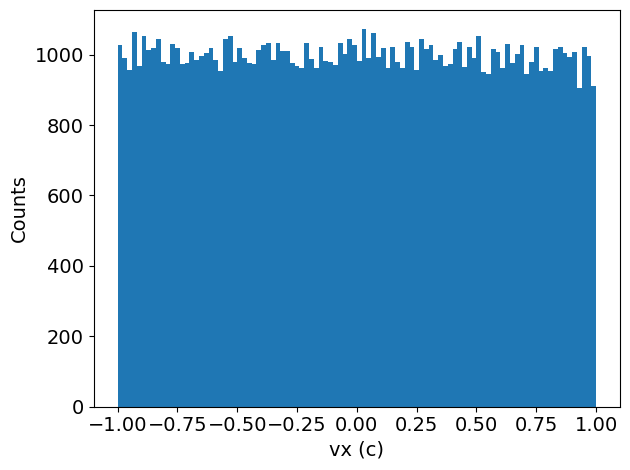

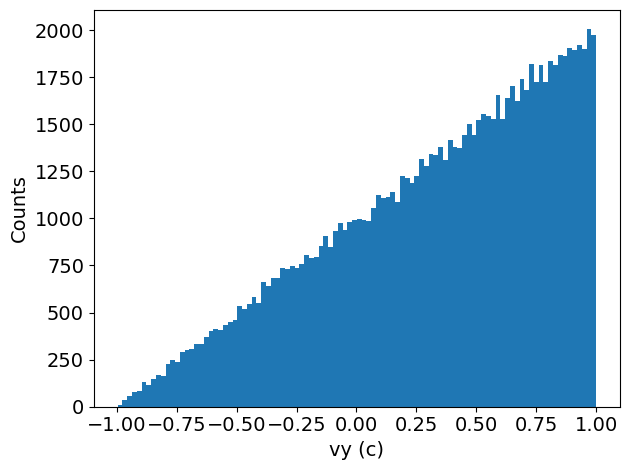

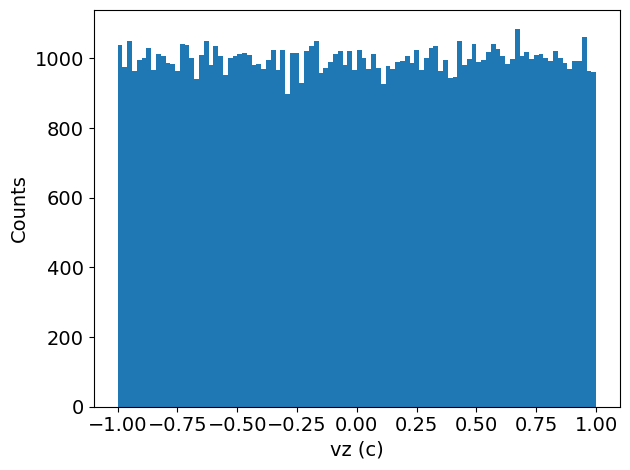

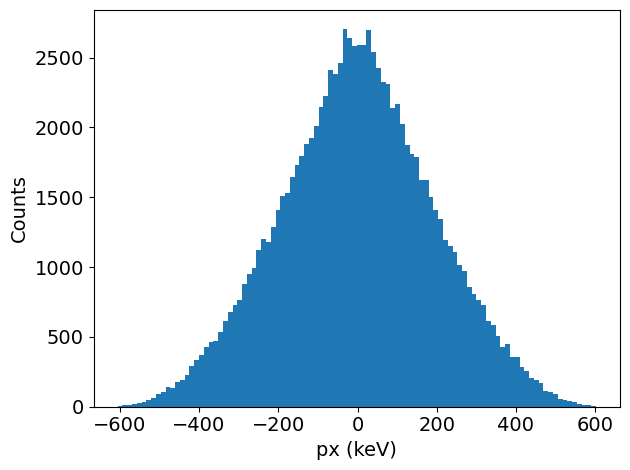

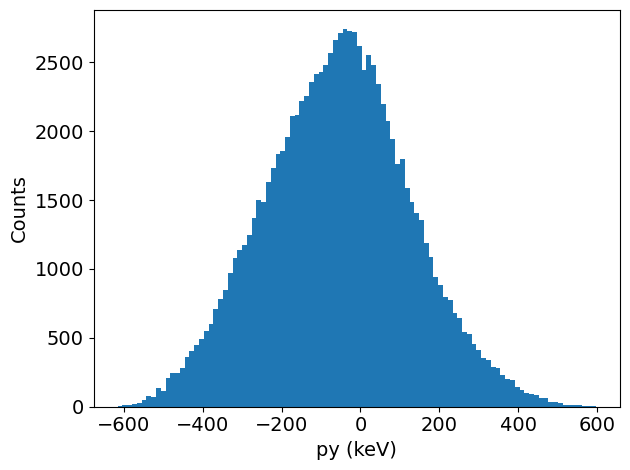

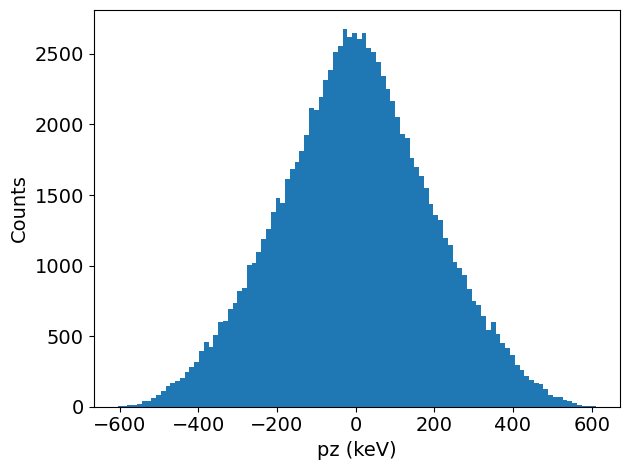

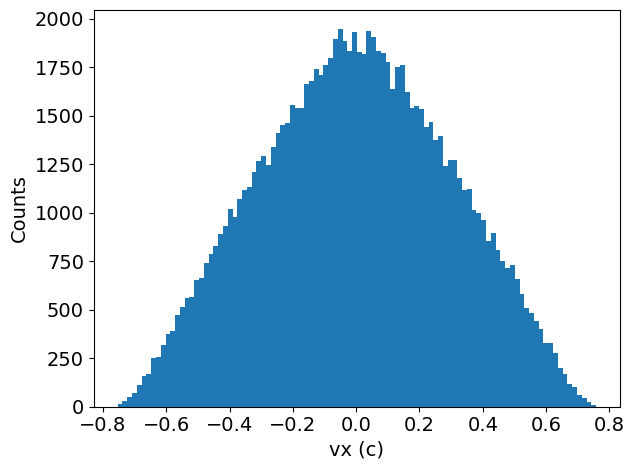

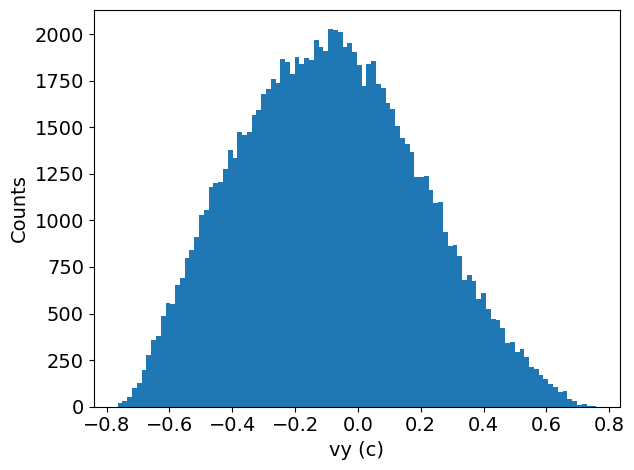

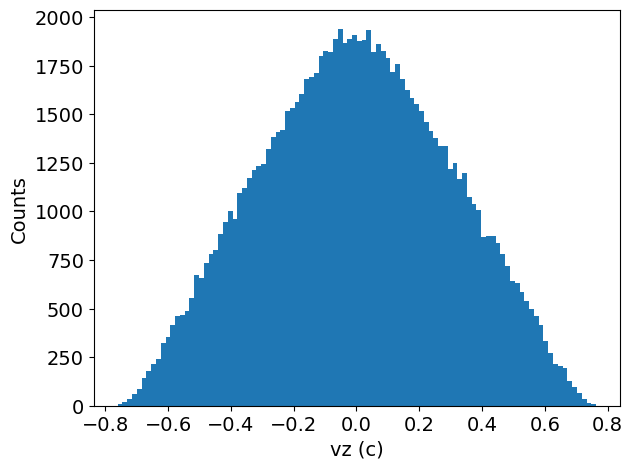

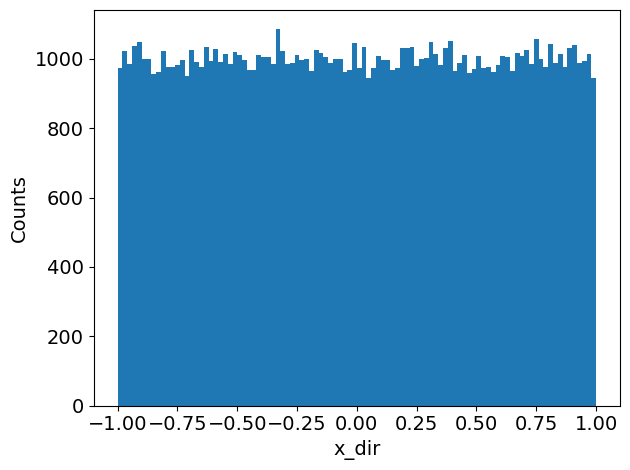

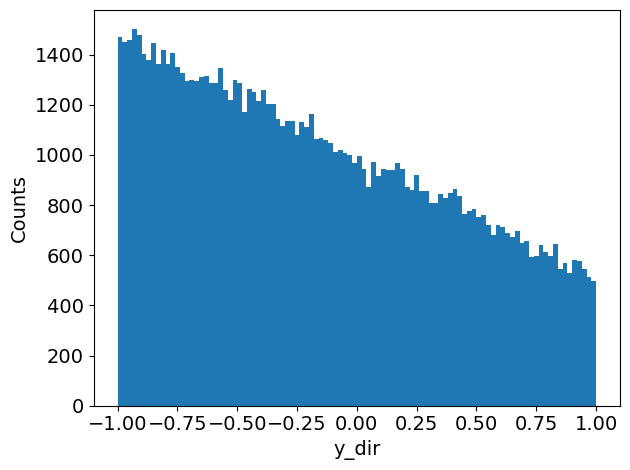

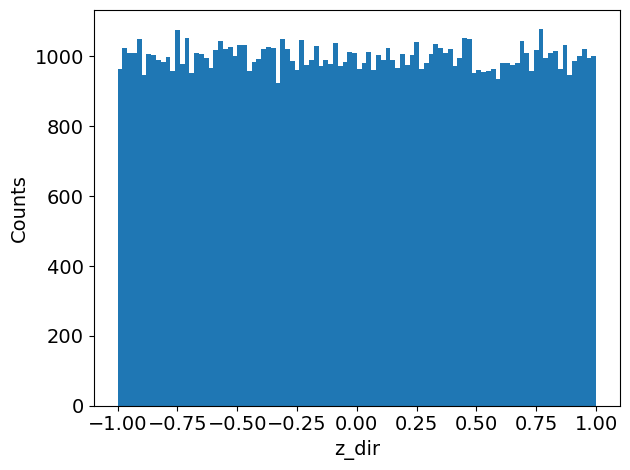

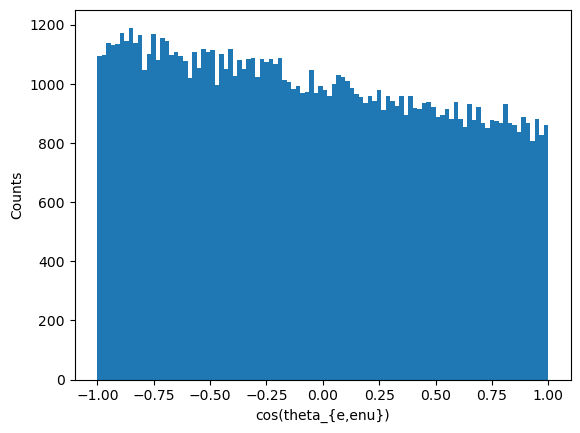

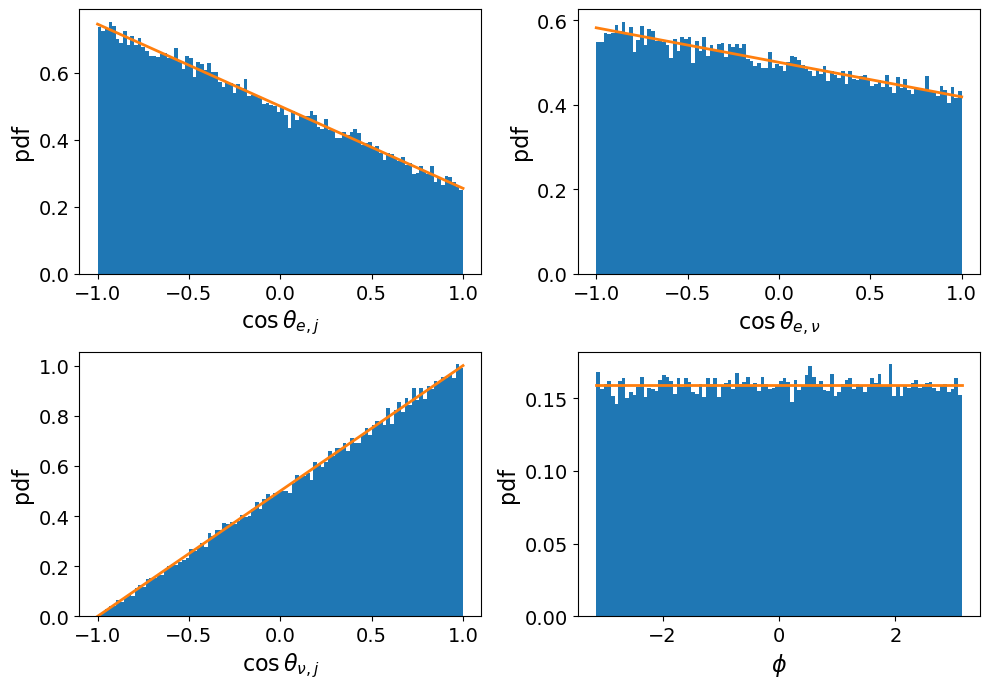

In [7]:
#SM Gamov-Teller but polarised in the Y direction
#xi = 2

alpha = 0.0072973525664
Z = 28 #need Z of daughter nuclei, 60Ni
gamma = np.sqrt(1-Z**2*alpha**2)

SM_60Co_polYpos = Co60_data_analysis("build/60Co_polYpos.txt")
SM_60Co_polYpos.event_mask()
SM_60Co_polYpos.kinematical_data()
SM_60Co_polYpos.plot_kin_histograms(fileName="build/60Co_polYpos.txt")
SM_60Co_polYpos.kinematical_data_ref(polDir=np.array([0,1,0]))
SM_60Co_polYpos.theoretical_dist(SM_coeffs)
SM_60Co_polYpos.plot_distribution_histograms(showTheory=True,bins=100)

100000


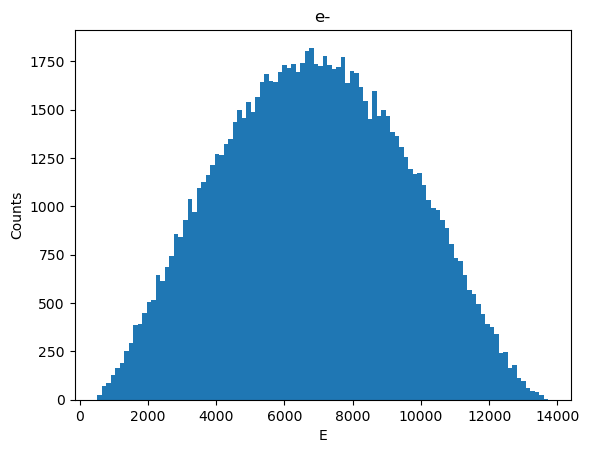

97176


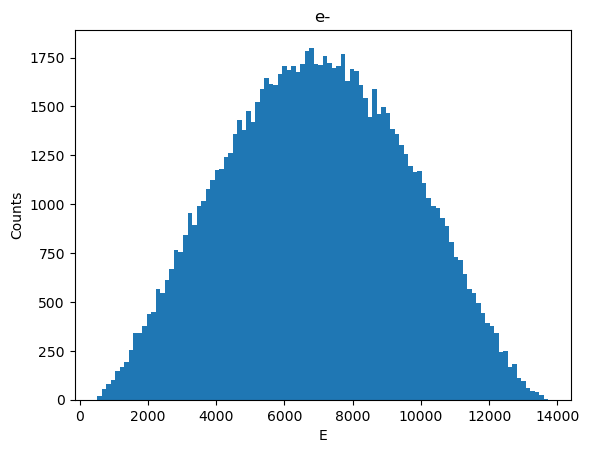

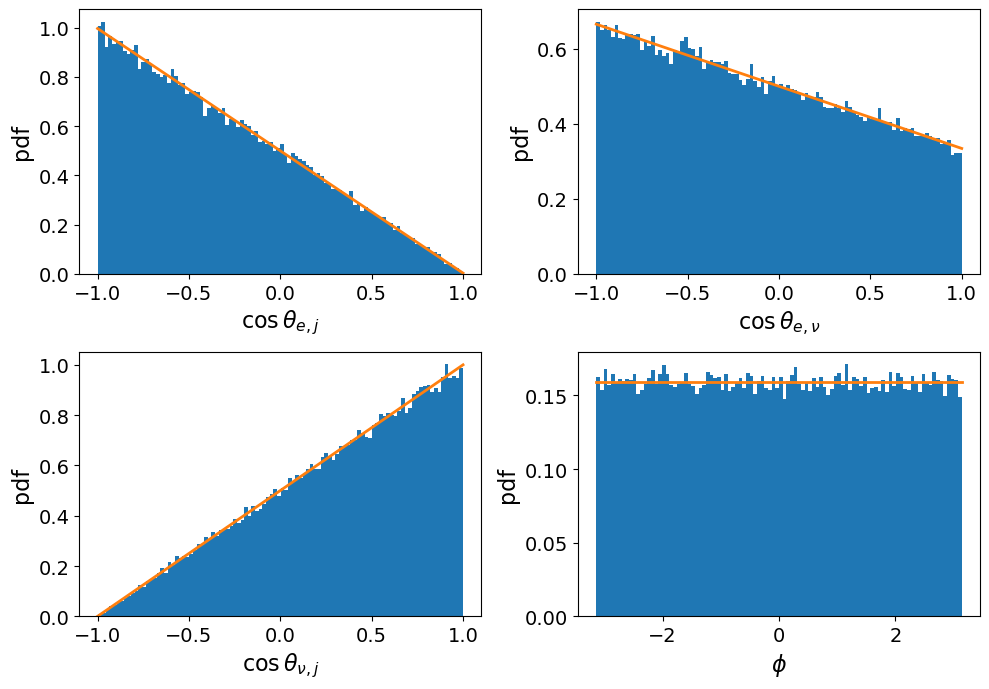

In [16]:
class B12_data_analysis(data_analysis):
    def __init__(self, fileName):
        super().__init__(fileName, 1)
    def event_mask(self):
        part_events = np.bincount(self.events)
        events_mask = np.arange(part_events.size)[part_events == 3] #12C + e- + enu for the 1+ -> 0+ gs
        self.data = self.data[np.isin(self.events, events_mask),:]
        self.names = self.names[np.isin(self.events, events_mask)]
    
#Standard Model Gamov-Teller

def SM_coeffs(E):
    return (-1/3, 0, 1, -1, 1, 0)
   
SM_12B_polZpos = B12_data_analysis("build/12B_polZpos.txt")
SM_12B_polZpos.kinematical_data()
SM_12B_polZpos.plot_E_dist()
SM_12B_polZpos.event_mask()
SM_12B_polZpos.kinematical_data()
SM_12B_polZpos.plot_E_dist()
SM_12B_polZpos.kinematical_data_ref()
SM_12B_polZpos.theoretical_dist(SM_coeffs)
SM_12B_polZpos.plot_distribution_histograms(showTheory=True,bins=100,fileName="12B_SM_hists")

100000


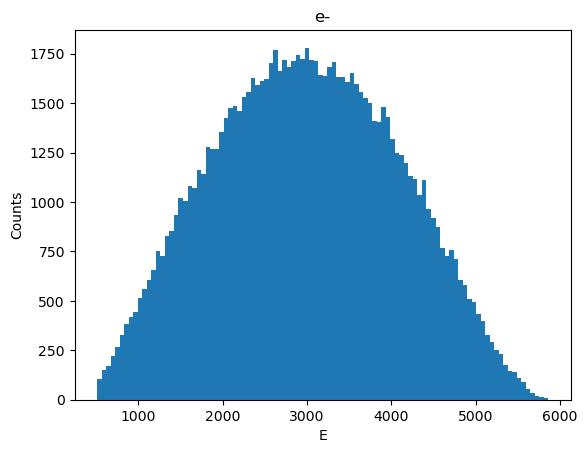

99992


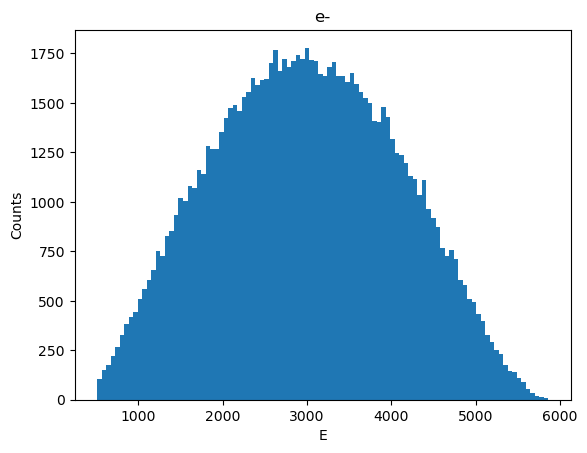

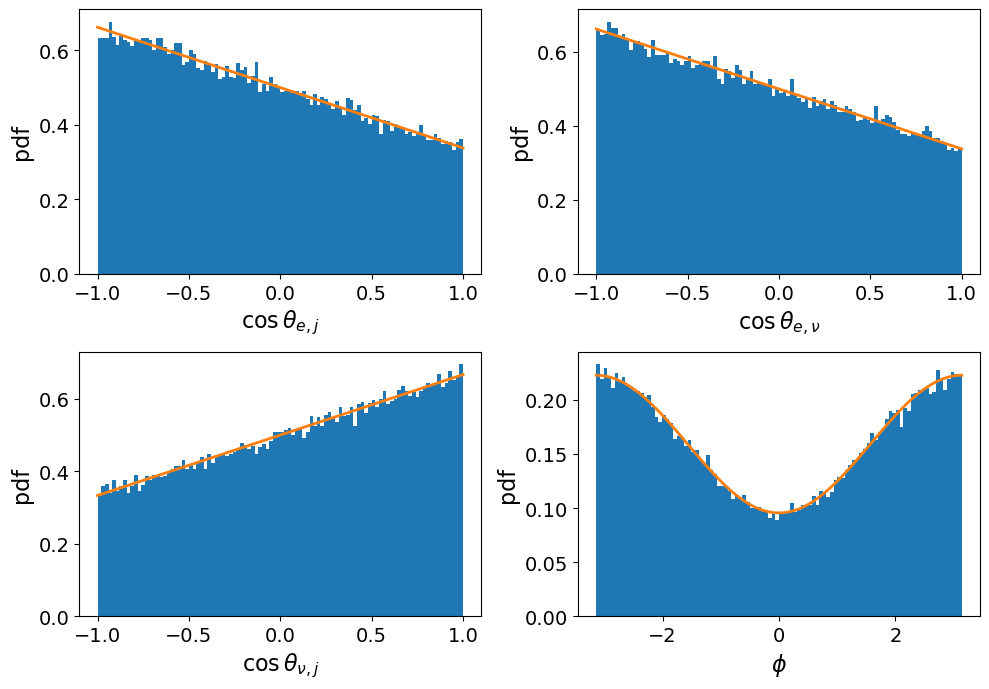

In [17]:
class F20_data_analysis(data_analysis):
    def __init__(self, fileName):
        super().__init__(fileName, 1)
    def event_mask(self):
        part_events = np.bincount(self.events)
        events_mask = np.arange(part_events.size)[part_events == 4] #20Ne + e- + enu + gamma for the 2+ -> 2+ 1633.67
        self.data = self.data[np.isin(self.events, events_mask),:]
        self.names = self.names[np.isin(self.events, events_mask)]
    
#Standard Model Gamov-Teller

def SM_coeffs(E):
    return (-1/3, 0, -1, -1/3, 1/3, 0)
   
SM_20F_polZpos = F20_data_analysis("build/20F_polZpos.txt")
SM_20F_polZpos.kinematical_data()
SM_20F_polZpos.plot_E_dist()
SM_20F_polZpos.event_mask()
SM_20F_polZpos.kinematical_data()
SM_20F_polZpos.plot_E_dist()
SM_20F_polZpos.kinematical_data_ref()
SM_20F_polZpos.theoretical_dist(SM_coeffs)
SM_20F_polZpos.plot_distribution_histograms(showTheory=True,bins=100,fileName="20F_SM_hists")

400000


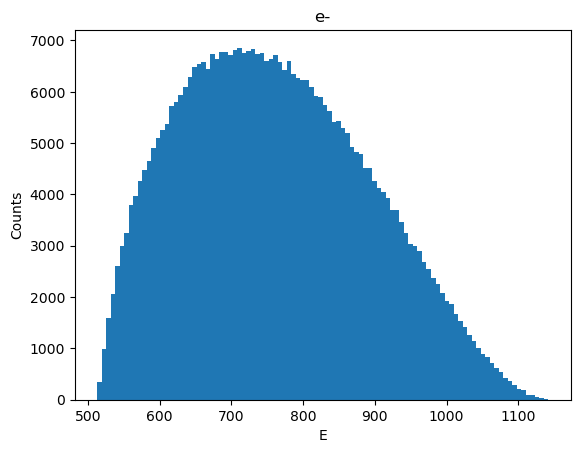

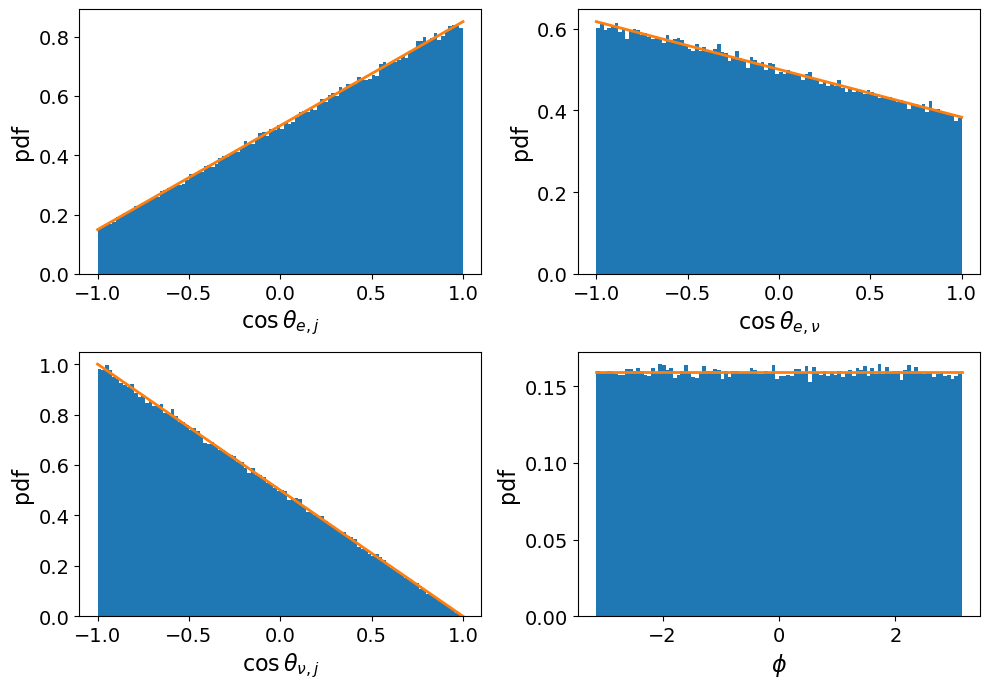

In [18]:
class F18_data_analysis(data_analysis):
    def __init__(self, fileName):
        super().__init__(fileName, -1)
    #no mask needed, all events are beta+ 1+ -> 0+ gs
    
def SM_coeffs(E):
    return (-1/3, 0, 1, 1, -1, 0)
   
SM_18F_polZpos = F18_data_analysis("build/18F_polZpos.txt")
SM_18F_polZpos.event_mask()
SM_18F_polZpos.kinematical_data()
SM_18F_polZpos.plot_E_dist()
SM_18F_polZpos.kinematical_data_ref()
SM_18F_polZpos.theoretical_dist(SM_coeffs)
SM_18F_polZpos.plot_distribution_histograms(showTheory=True,bins=100,fileName="18F_SM_hists")

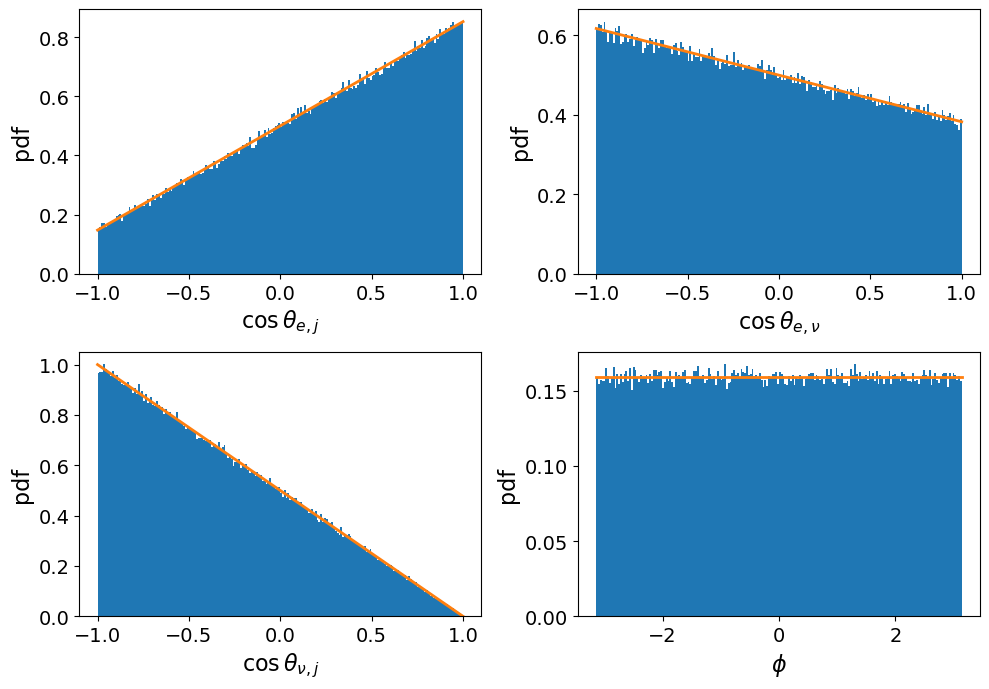

In [19]:
#Gamov-Teller with C_T = C_T' = 1/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 8 #need Z of daughter nuclei, 18O
gamma = np.sqrt(1-Z**2*alpha**2)
    
def CTposRe_coeffs(E):
    a = -1/3*(1/3)
    c = 1/3
    A = 1/3
    b = -2/3*gamma*np.sqrt(2)
    B = 2/3*(-1.5+gamma*mass_e/E*np.sqrt(2))
    return (a, b, c, A, B, 0)
   
CTposRe_18F_polZpos = F18_data_analysis("build/18F_polZpos_ctposRe.txt")
CTposRe_18F_polZpos.event_mask()
CTposRe_18F_polZpos.kinematical_data()
CTposRe_18F_polZpos.kinematical_data_ref()
CTposRe_18F_polZpos.theoretical_dist(CTposRe_coeffs)
CTposRe_18F_polZpos.plot_distribution_histograms(showTheory=True,bins=200,fileName="18F_CTRe_hists")

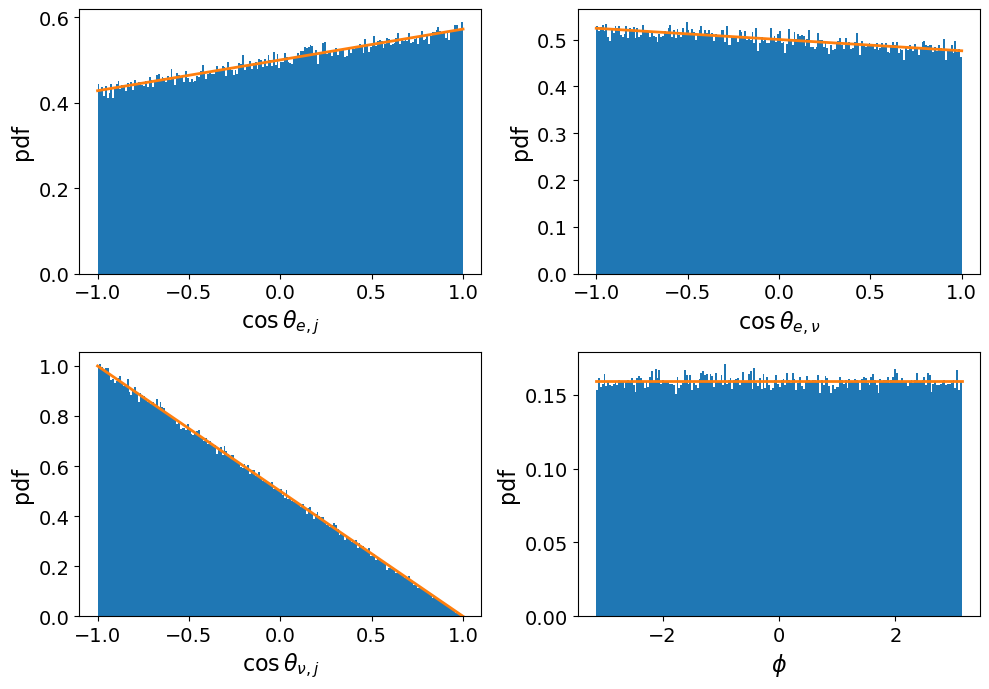

In [12]:
#Gamov-Teller with C_T = C_T' = -1/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 8 #need Z of daughter nuclei, 18O
gamma = np.sqrt(1-Z**2*alpha**2)

def CTnegRe_coeffs(E):
    a = -1/3*(1/3)
    c = 1/3
    A = 1/3
    b = +2/3*gamma*np.sqrt(2)
    B = 2/3*(-1.5-gamma*mass_e/E*np.sqrt(2))
    return (a, b, c, A, B, 0)
   
CTnegRe_18F_polZpos = F18_data_analysis("build/18F_polZpos_ctnegRe.txt")
CTnegRe_18F_polZpos.event_mask()
CTnegRe_18F_polZpos.kinematical_data()
CTnegRe_18F_polZpos.kinematical_data_ref()
CTnegRe_18F_polZpos.theoretical_dist(CTnegRe_coeffs)
CTnegRe_18F_polZpos.plot_distribution_histograms(showTheory=True,bins=200)

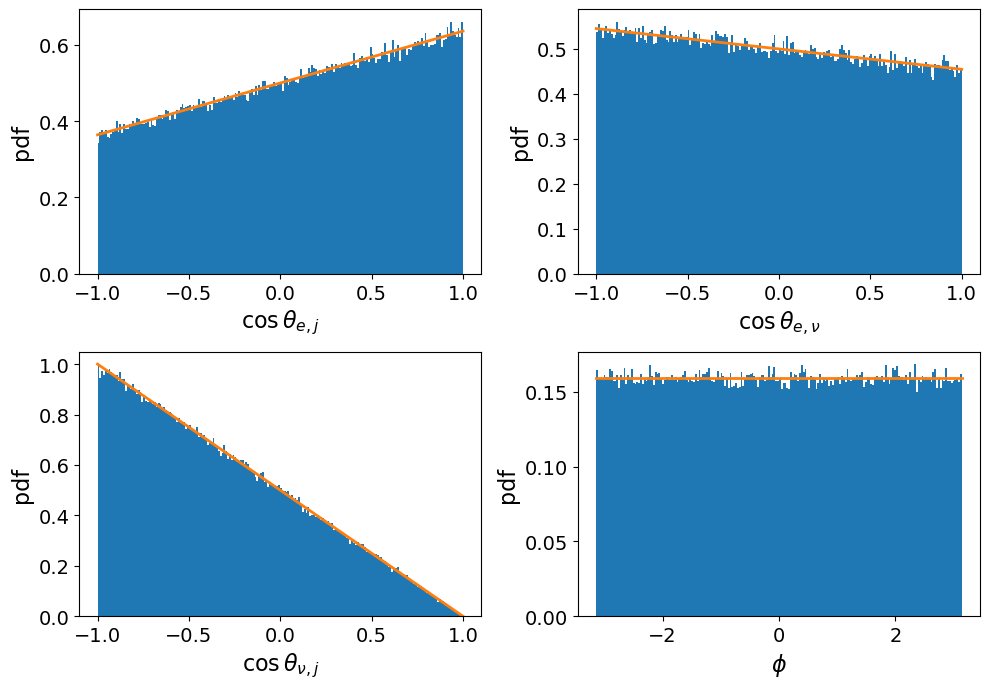

In [21]:
#Gamov-Teller with C_T = C_T' = i/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 8 #need Z of daughter nuclei, 18O
gamma = np.sqrt(1-Z**2*alpha**2)

def CTposIm_coeffs(E):
    coulombCorr = alpha*Z/np.sqrt(E**2/mass_e**2-1)
    a = 1/3*(1/3)*(-1-2*coulombCorr*np.sqrt(2))
    c = -1/3*(-1-2*coulombCorr*np.sqrt(2))
    A = 1/3*(1+2*coulombCorr*np.sqrt(2))
    b = 0
    B = -1
    return (a, b, c, A, B, 0)

CTposIm_18F_polZpos = F18_data_analysis("build/18F_polZpos_ctposIm.txt")
CTposIm_18F_polZpos.event_mask()
CTposIm_18F_polZpos.kinematical_data()
CTposIm_18F_polZpos.kinematical_data_ref()
CTposIm_18F_polZpos.theoretical_dist(CTposIm_coeffs)
CTposIm_18F_polZpos.plot_distribution_histograms(showTheory=True,bins=200,fileName="18F_CTIm_hists")

/tmp/ipykernel_5896/2596415045.py:36: RuntimeWarning: divide by zero encountered in divide
  data_cosphi = (self.data_angle_elenu-self.cos_el*self.cos_enu)/sin_el/sin_enu
/tmp/ipykernel_5896/2596415045.py:37: RuntimeWarning: divide by zero encountered in divide
  data_sinphi = z_cross_elenu/sin_el/sin_enu


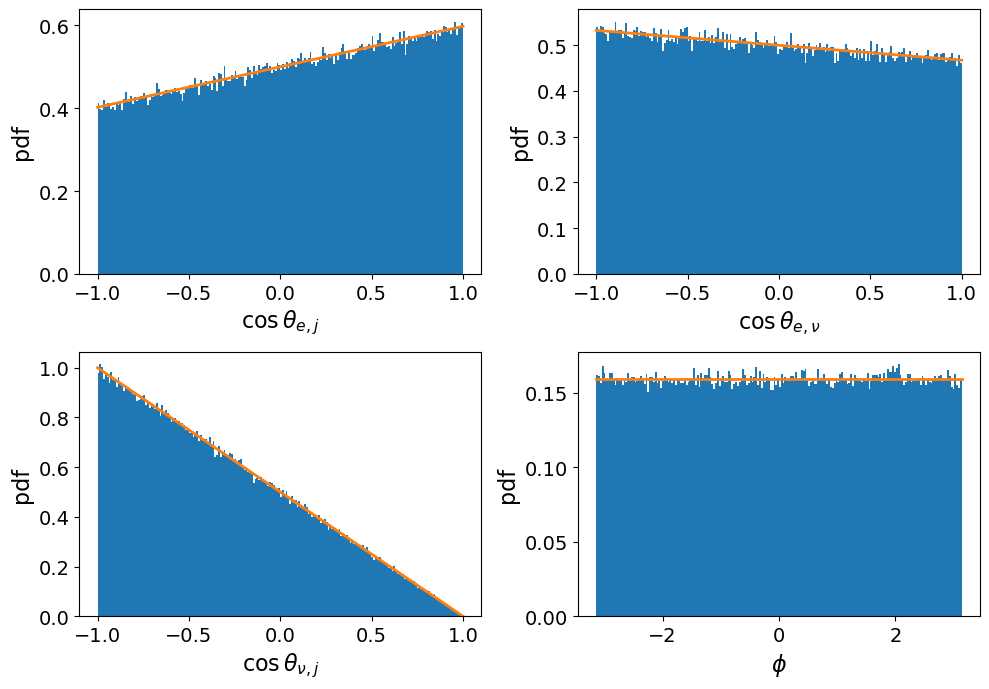

In [14]:
#Gamov-Teller with C_T = C_T' = -i/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 8 #need Z of daughter nuclei, 18O
gamma = np.sqrt(1-Z**2*alpha**2)

def CTnegIm_coeffs(E):
    coulombCorr = alpha*Z/np.sqrt(E**2/mass_e**2-1)
    a = 1/3*(1/3)*(-1+2*coulombCorr*np.sqrt(2))
    c = -1/3*(-1+2*coulombCorr*np.sqrt(2))
    A = 1/3*(1-2*coulombCorr*np.sqrt(2))
    b = 0
    B = -1
    return (a, b, c, A, B, 0)

CTnegIm_18F_polZpos = F18_data_analysis("build/18F_polZpos_ctnegIm.txt")
CTnegIm_18F_polZpos.event_mask()
CTnegIm_18F_polZpos.kinematical_data()
CTnegIm_18F_polZpos.kinematical_data_ref()
CTnegIm_18F_polZpos.theoretical_dist(CTnegIm_coeffs)
CTnegIm_18F_polZpos.plot_distribution_histograms(showTheory=True,bins=200)

/tmp/ipykernel_5896/2596415045.py:36: RuntimeWarning: divide by zero encountered in divide
  data_cosphi = (self.data_angle_elenu-self.cos_el*self.cos_enu)/sin_el/sin_enu
/tmp/ipykernel_5896/2596415045.py:37: RuntimeWarning: divide by zero encountered in divide
  data_sinphi = z_cross_elenu/sin_el/sin_enu


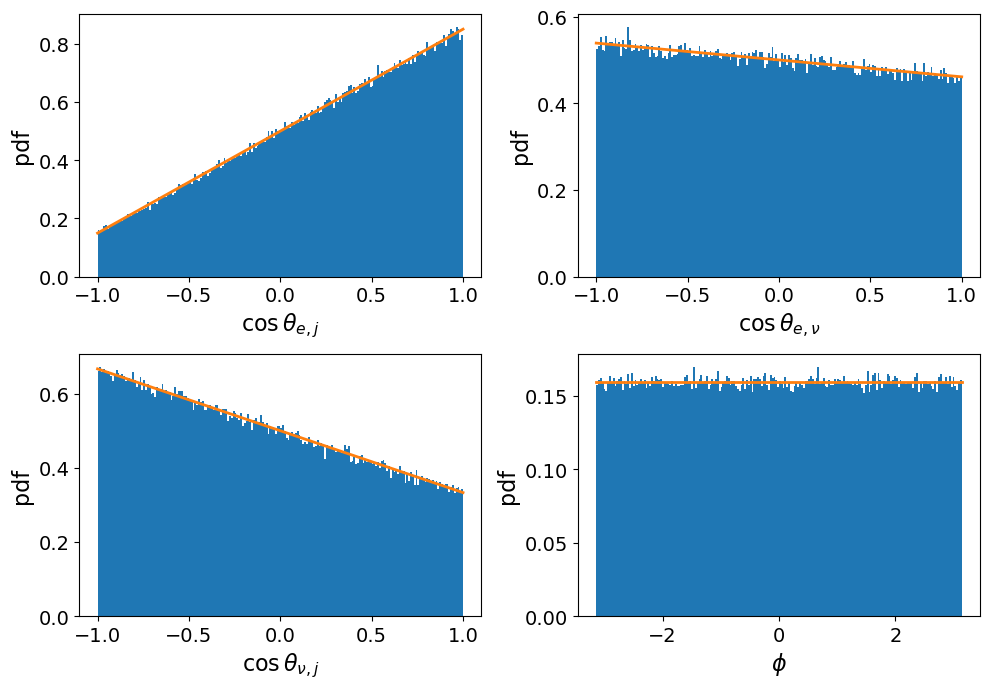

In [20]:
#Gamov-Teller with C_T = C_T' = -i/np.sqrt(2), C_A = C_A' = 1
#xi = 3

alpha = 0.0072973525664
Z = 8 #need Z of daughter nuclei, 18O
gamma = np.sqrt(1-Z**2*alpha**2)

def CTmixIm_coeffs(E):
    coulombCorr = alpha*Z/np.sqrt(E**2/mass_e**2-1)
    a = 1/3*(1/3)*(-1)
    c = -1/3*(-1)
    A = 1
    b = 0
    B = -1/3
    return (a, b, c, A, B, 0)

CTmixIm_18F_polZpos = F18_data_analysis("build/18F_polZpos_ctmixIm.txt")
CTmixIm_18F_polZpos.event_mask()
CTmixIm_18F_polZpos.kinematical_data()
CTmixIm_18F_polZpos.kinematical_data_ref()
CTmixIm_18F_polZpos.theoretical_dist(CTmixIm_coeffs)
CTmixIm_18F_polZpos.plot_distribution_histograms(showTheory=True,bins=200,fileName="18F_CTmix_hists")

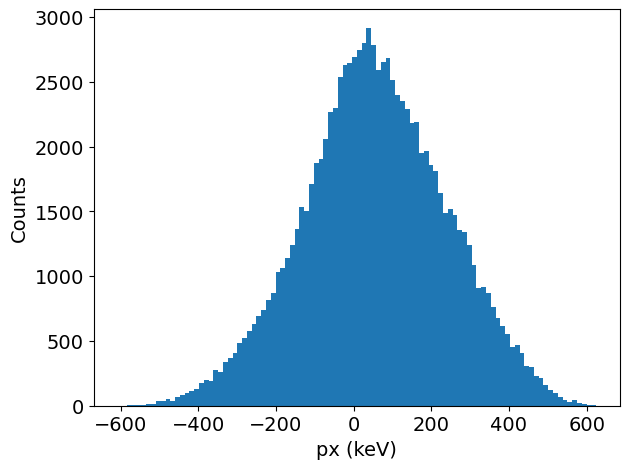

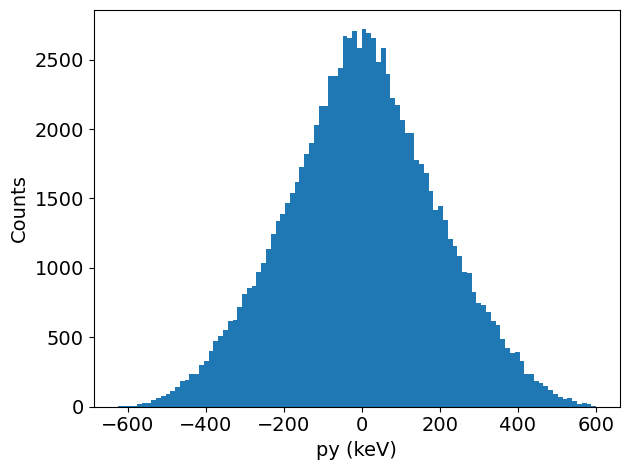

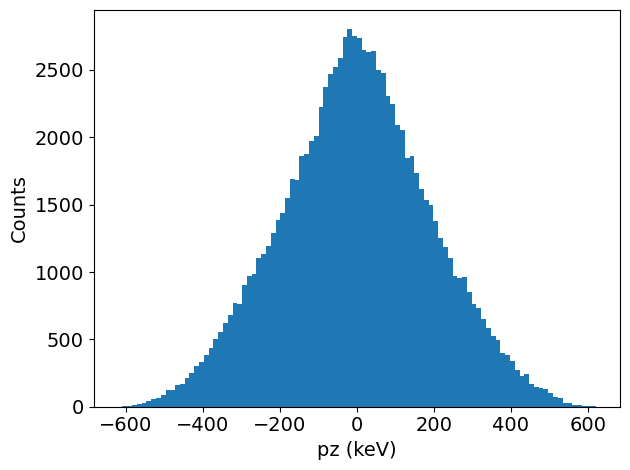

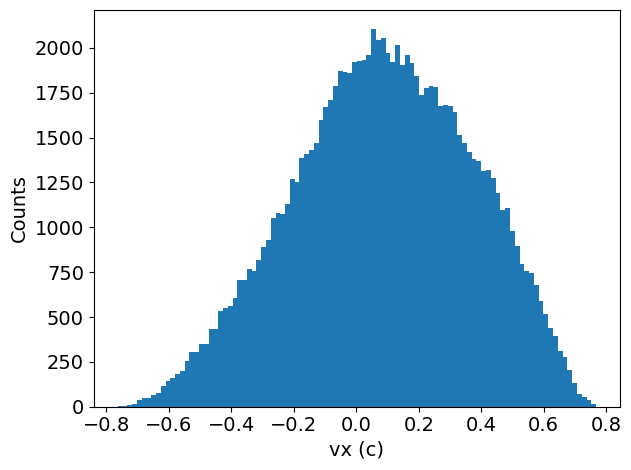

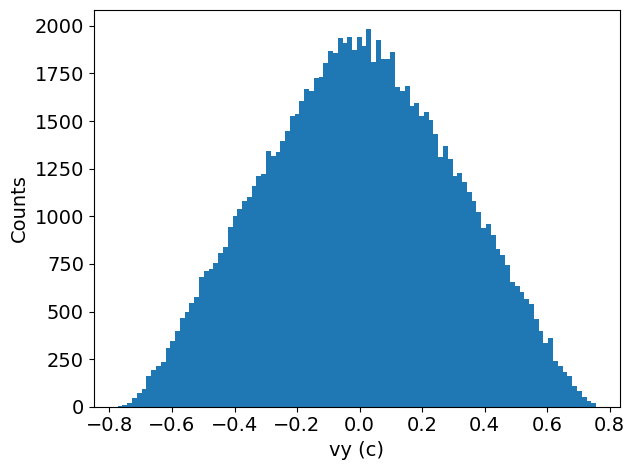

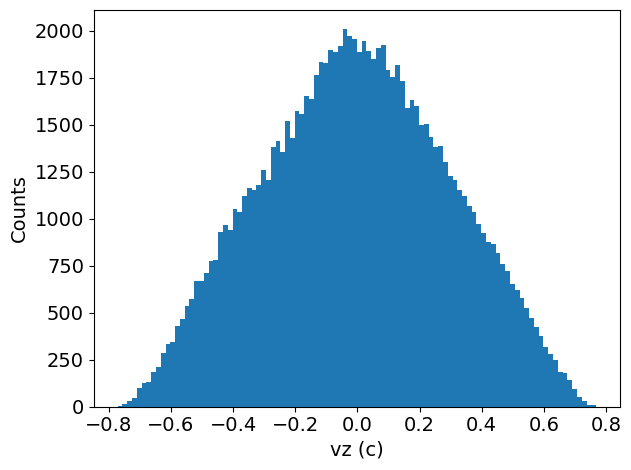

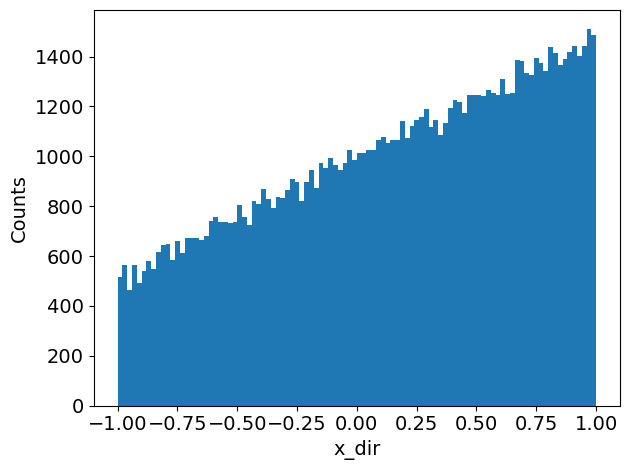

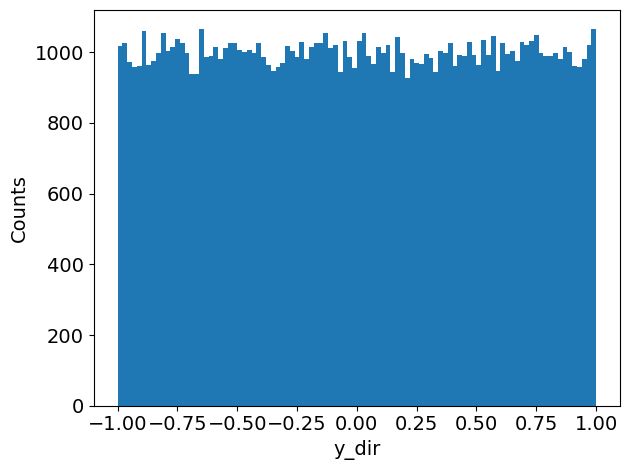

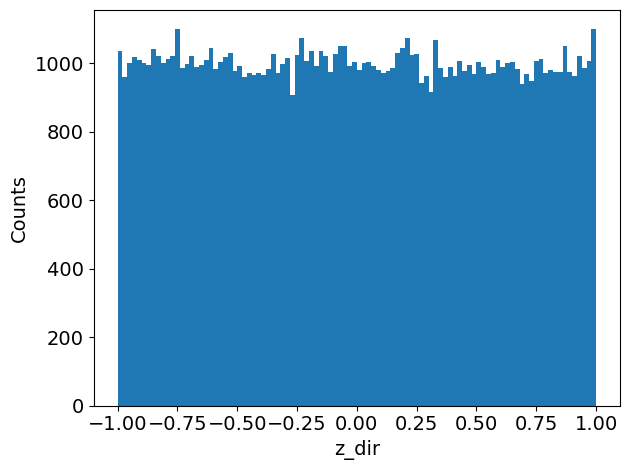

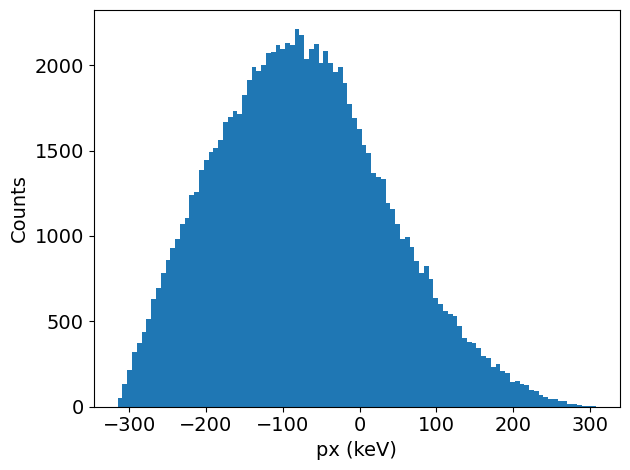

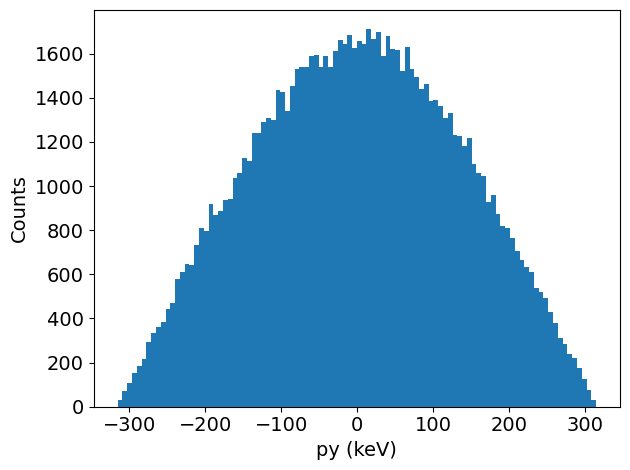

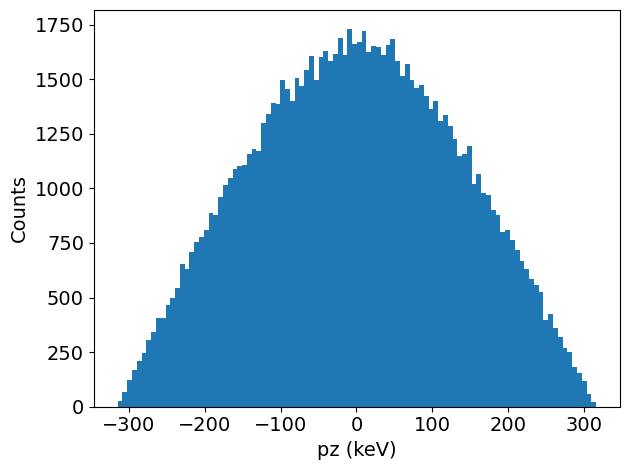

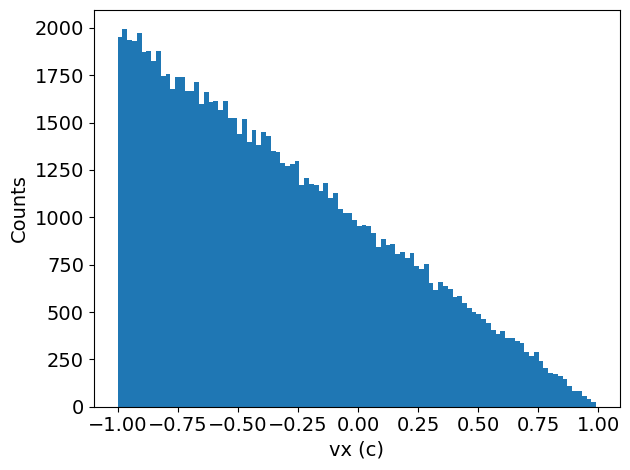

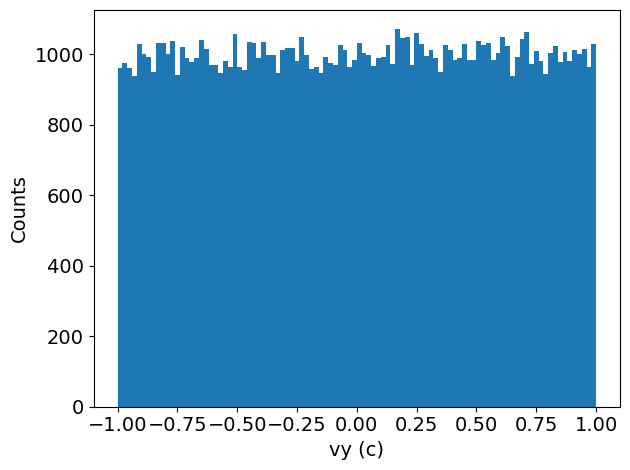

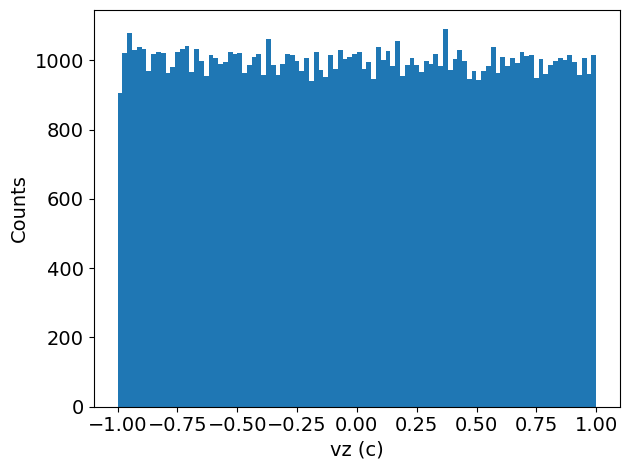

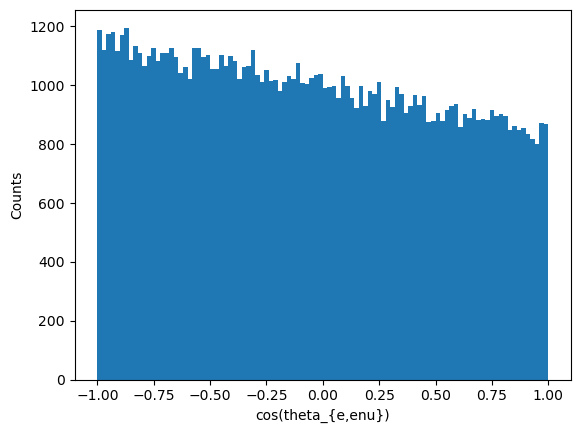

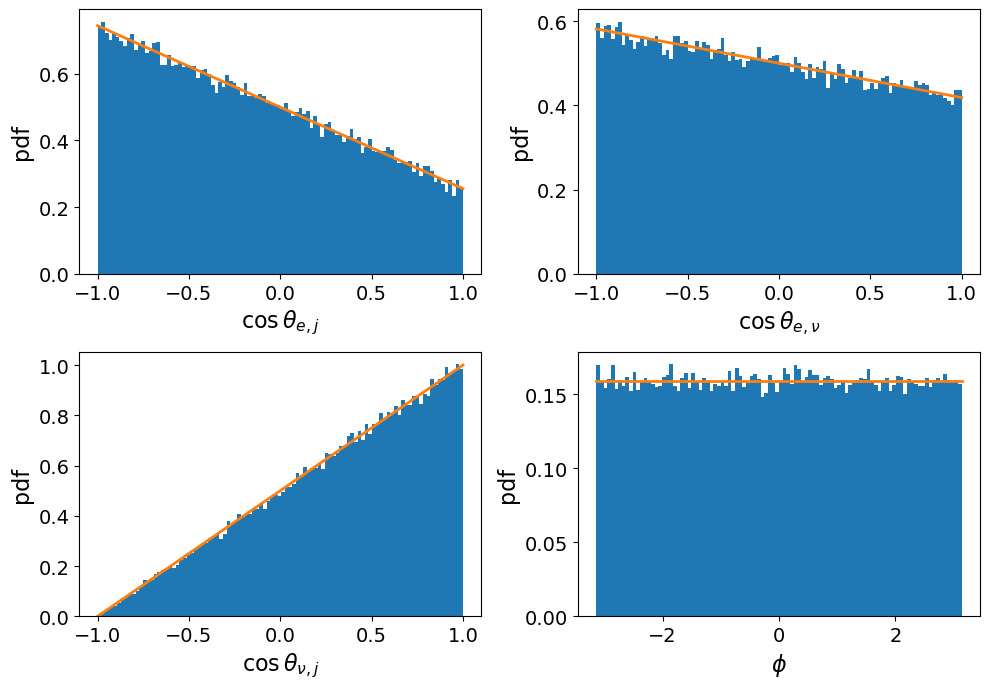

In [5]:
class Co60_data_analysis(data_analysis):
    def __init__(self, fileName):
        super().__init__(fileName, 1)
    def event_mask(self):
        part_events = np.bincount(self.events)
        events_mask = np.arange(part_events.size)[part_events == 5] #60Ni + e- + enu + 2 gamma
        self.data = self.data[np.isin(self.events, events_mask),:]
        self.names = self.names[np.isin(self.events, events_mask)]
    
#Standard Model Gamov-Teller

def SM_coeffs(E):
    return (-1/3, 0, 1, -1, 1, 0)
   
SM_60Co_polXneg = Co60_data_analysis("build/60Co_polXneg.txt")
SM_60Co_polXneg.event_mask()
SM_60Co_polXneg.kinematical_data()
SM_60Co_polXneg.plot_kin_histograms("build/60Co_polXneg.txt")
SM_60Co_polXneg.kinematical_data_ref(polDir=np.array([-1,0,0]))
SM_60Co_polXneg.theoretical_dist(SM_coeffs)
SM_60Co_polXneg.plot_distribution_histograms(showTheory=True,bins=100)